In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import json

In [2]:
%matplotlib inline

In [3]:
with open("all_data_final_Derbyshire.json", "r") as f:
    data = json.loads(f.read())

In [4]:
data[0]

{'county': 'Derbyshire',
 'code': 'E00098112',
 'lad': 'Amber Valley',
 'rgn_main': 'East Midlands',
 'population': 250,
 'amenities': [{'name': 'N/A',
   'amenity': 'post_box',
   'data_type': 'node',
   'lat': '53.0955954',
   'lon': '-1.3784729',
   'other_tags': {'amenity': 'post_box'}},
  {'name': 'Wesley Methodist Church',
   'amenity': 'place_of_worship',
   'data_type': 'way',
   'lat': '53.0964645',
   'lon': '-1.3803576',
   'other_tags': {'addr:city': 'Alfreton',
    'addr:postcode': 'DE55 7HW',
    'addr:street': 'Ellesmere Avenue',
    'amenity': 'place_of_worship',
    'building': 'yes',
    'denomination': 'methodist',
    'ele': '133',
    'name': 'Wesley Methodist Church',
    'old_fhrs:id': '983997',
    'religion': 'christian',
    'website': 'https://alfretonwesley.co.uk/'}},
  {'name': 'Breath of Life Clinic',
   'amenity': 'healthcare',
   'data_type': 'way',
   'lat': '53.0956675',
   'lon': '-1.3783229',
   'other_tags': {'amenity': 'healthcare',
    'building':

In [5]:
oa_lookup = pd.read_csv('Output_Areas_(2011)_to_Output_Areas_(2021)_to_Local_Authority_District_(2022)_Lookup_in_England_and_Wales_(Version_2).csv')
oa_lookup.head()

/var/folders/zs/1hvc18dn7v94z77k1xy7g90c0000gn/T/ipykernel_34646/3117227149.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  oa_lookup = pd.read_csv('Output_Areas_(2011)_to_Output_Areas_(2021)_to_Local_Authority_District_(2022)_Lookup_in_England_and_Wales_(Version_2).csv')


ObjectId     OA11CD     OA21CD    LAD22CD         LAD22NM LAD22NMW
0         1  E00000001  E00000001  E09000001  City of London      NaN
1         2  E00000003  E00000003  E09000001  City of London      NaN
2         3  E00000005  E00000005  E09000001  City of London      NaN
3         4  E00000007  E00000007  E09000001  City of London      NaN
4         5  E00000010  E00000010  E09000001  City of London      NaN

In [6]:
urban_rural_lookup = pd.read_csv('RUC11_OA11_EW.csv')
urban_rural_lookup.head()

OA11CD RUC11CD                    RUC11 BOUND_CHGIND ASSIGN_CHGIND  \
0  E00000001      A1  Urban major conurbation            U           NaN   
1  E00000003      A1  Urban major conurbation            U           NaN   
2  E00000005      A1  Urban major conurbation            U           NaN   
3  E00000007      A1  Urban major conurbation            U           NaN   
4  E00000010      A1  Urban major conurbation            U           NaN   

  ASSIGN_CHREASON  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN

In [7]:
mergey = oa_lookup.merge(urban_rural_lookup, on='OA11CD')
mergey.head()

ObjectId     OA11CD     OA21CD    LAD22CD         LAD22NM LAD22NMW RUC11CD  \
0         1  E00000001  E00000001  E09000001  City of London      NaN      A1   
1         2  E00000003  E00000003  E09000001  City of London      NaN      A1   
2         3  E00000005  E00000005  E09000001  City of London      NaN      A1   
3         4  E00000007  E00000007  E09000001  City of London      NaN      A1   
4         5  E00000010  E00000010  E09000001  City of London      NaN      A1   

                     RUC11 BOUND_CHGIND ASSIGN_CHGIND ASSIGN_CHREASON  
0  Urban major conurbation            U           NaN             NaN  
1  Urban major conurbation            U           NaN             NaN  
2  Urban major conurbation            U           NaN             NaN  
3  Urban major conurbation            U           NaN             NaN  
4  Urban major conurbation            U           NaN             NaN

In [10]:
mergey.groupby(['RUC11']).size().sort_values(ascending=False)

RUC11
Urban city and town                                         81004
Urban major conurbation                                     59199
Rural town and fringe                                       15850
Rural village                                                9646
Urban minor conurbation                                      6277
Rural hamlets and isolated dwellings                         5969
Rural town and fringe in a sparse setting                    1044
Rural village in a sparse setting                            1042
Rural hamlets and isolated dwellings in a sparse setting      887
Urban city and town in a sparse setting                       490
dtype: int64

In [11]:
lookup_df = pd.read_csv('oa_to_parishes.csv')
lookup_df.head()

/var/folders/zs/1hvc18dn7v94z77k1xy7g90c0000gn/T/ipykernel_34646/1713820288.py:1: DtypeWarning: Columns (4,7,10,13) have mixed types. Specify dtype option on import or set low_memory=False.
  lookup_df = pd.read_csv('oa_to_parishes.csv')


ObjectId     OA21CD    PAR22CD        PAR22NM PAR22NMW   LTLA22CD  \
0         1  E00060311  E04000255  Dalton Piercy      NaN  E06000001   
1         2  E00060356  E04000257       Greatham      NaN  E06000001   
2         3  E00060360  E04000257       Greatham      NaN  E06000001   
3         4  E00060357  E04000257       Greatham      NaN  E06000001   
4         5  E00060359  E04000257       Greatham      NaN  E06000001   

     LTLA22NM LTLA22NMW   UTLA22CD    UTLA22NM UTLA22NMW    RGN22CD  \
0  Hartlepool       NaN  E06000001  Hartlepool       NaN  E12000001   
1  Hartlepool       NaN  E06000001  Hartlepool       NaN  E12000001   
2  Hartlepool       NaN  E06000001  Hartlepool       NaN  E12000001   
3  Hartlepool       NaN  E06000001  Hartlepool       NaN  E12000001   
4  Hartlepool       NaN  E06000001  Hartlepool       NaN  E12000001   

      RGN22NM RGN22NMW   CTRY22CD CTRY22NM CTRY22NMW    NAT22CD  \
0  North East      NaN  E92000001  England    Lloegr  K04000001   
1  North East      NaN  E92000001  England    Lloegr  K04000001   
2  North East      NaN  E92000001  England    Lloegr  K04000001   
3  North East      NaN  E92000001  England    Lloegr  K04000001   
4  North East      NaN  E92000001  England    Lloegr  K04000001   

             NAT22NM        NAT22NMW  
0  England and Wales  Cymru a Lloegr  
1  England and Wales  Cymru a Lloegr  
2  England and Wales  Cymru a Lloegr  
3  England and Wales  Cymru a Lloegr  
4  England and Wales  Cymru a Lloegr

In [17]:
big_lookup = lookup_df.merge(mergey, how='left', left_on='OA21CD', right_on='OA21CD')
big_lookup.head()

ObjectId_x     OA21CD    PAR22CD        PAR22NM PAR22NMW   LTLA22CD  \
0           1  E00060311  E04000255  Dalton Piercy      NaN  E06000001   
1           2  E00060356  E04000257       Greatham      NaN  E06000001   
2           3  E00060360  E04000257       Greatham      NaN  E06000001   
3           4  E00060357  E04000257       Greatham      NaN  E06000001   
4           5  E00060359  E04000257       Greatham      NaN  E06000001   

     LTLA22NM LTLA22NMW   UTLA22CD    UTLA22NM  ... ObjectId_y     OA11CD  \
0  Hartlepool       NaN  E06000001  Hartlepool  ...    58645.0  E00060311   
1  Hartlepool       NaN  E06000001  Hartlepool  ...    58716.0  E00060356   
2  Hartlepool       NaN  E06000001  Hartlepool  ...    58749.0  E00060360   
3  Hartlepool       NaN  E06000001  Hartlepool  ...    58720.0  E00060357   
4  Hartlepool       NaN  E06000001  Hartlepool  ...    58728.0  E00060359   

     LAD22CD     LAD22NM LAD22NMW RUC11CD                  RUC11 BOUND_CHGIND  \
0  E06000001  Hartlepool      NaN      E1          Rural village            U   
1  E06000001  Hartlepool      NaN      C1    Urban city and town            U   
2  E06000001  Hartlepool      NaN      C1    Urban city and town            U   
3  E06000001  Hartlepool      NaN      D1  Rural town and fringe            U   
4  E06000001  Hartlepool      NaN      C1    Urban city and town            U   

  ASSIGN_CHGIND ASSIGN_CHREASON  
0           NaN             NaN  
1           NaN             NaN  
2           NaN             NaN  
3           NaN             NaN  
4           NaN             NaN  

[5 rows x 30 columns]

In [38]:
big_lookup.groupby(['RUC11']).size().sort_values()

RUC11
Urban city and town in a sparse setting                       490
Rural hamlets and isolated dwellings in a sparse setting      887
Rural village in a sparse setting                            1042
Rural town and fringe in a sparse setting                    1044
Rural hamlets and isolated dwellings                         5969
Urban minor conurbation                                      6277
Rural village                                                9646
Rural town and fringe                                       15850
Urban major conurbation                                     59199
Urban city and town                                         81004
dtype: int64

In [18]:
parish_data = {}
for entry in data:
    parish_name = big_lookup[big_lookup.OA21CD == entry['code']].PAR22NM.values[0]
    ruc_11_type = big_lookup[big_lookup.OA21CD == entry['code']].RUC11.values[0]
    try:
        parish_data[parish_name]['population'] += entry['population']
        parish_data[parish_name]['classification'].append({'population': entry['population'], 'classy': ruc_11_type})
        for am in entry['amenities']:
            parish_data[parish_name]['amenities'].append(am)
    except:
        parish_data[parish_name] = {
            'population': entry['population'],
            'amenities': [am for am in entry['amenities']],
            'classification': [{'population': entry['population'], 'classy': ruc_11_type}]
        }

In [23]:
sorted(parish_data['Brampton']['classification'], key=lambda x: x['population'], reverse=True)[0]

{'population': 366, 'classy': 'Rural hamlets and isolated dwellings'}

In [27]:
for key, val in sorted(parish_data.items(), key=lambda x: x[1]['population'], reverse=False):
    print("{0} - population {1} - {2} pubs - {3} types of OA and majority {4}".format(
        key, 
        val['population'],
        len([t for t in val['amenities'] if t['amenity'] == 'pub']),
        len(set([e['classy'] for e in val['classification']])),
        sorted(val['classification'], key=lambda x: x['population'], reverse=True)[0]['classy']
    ))

Ashleyhay - population 105 - 0 pubs - 1 types of OA and majority Rural hamlets and isolated dwellings
Harthill - population 108 - 0 pubs - 1 types of OA and majority Rural hamlets and isolated dwellings
Bradbourne - population 110 - 0 pubs - 1 types of OA and majority Rural hamlets and isolated dwellings
Wardlow - population 113 - 1 pubs - 1 types of OA and majority Rural village
Lullington - population 124 - 1 pubs - 1 types of OA and majority Rural village
Eaton and Alsop - population 129 - 0 pubs - 1 types of OA and majority Rural hamlets and isolated dwellings
Brough and Shatton - population 129 - 0 pubs - 1 types of OA and majority Rural village
King Sterndale - population 130 - 0 pubs - 1 types of OA and majority Rural hamlets and isolated dwellings
Mapleton - population 132 - 1 pubs - 1 types of OA and majority Rural village
Middleton and Smerrill - population 133 - 0 pubs - 1 types of OA and majority Rural hamlets and isolated dwellings
Tissington and Lea Hall - population 134 

In [28]:
import os
import glob

In [29]:
!ls

Cambridgeshire_county_data.json
Cumbria_county_data.json
DataAnalysis.ipynb
Derbyshire_county_data.json
Devon_county_data.json
East Sussex_county_data.json
Essex_county_data.json
Gloucestershire_county_data.json
Greater Manchester_county_data.json
Hampshire_county_data.json
Hertfordshire_county_data.json
Inner London_county_data.json
Kent_county_data.json
Lancashire_county_data.json
Leicestershire_county_data.json
Lincolnshire_county_data.json
Local_Authority_District_to_County_(April_2021)_Lookup_in_England.csv
Local_Authority_District_to_Region_(April_2021)_Lookup_in_England.csv
Merseyside_county_data.json
Norfolk_county_data.json
North Yorkshire_county_data.json
Nottinghamshire_county_data.json
OA_2021_EW_BFE_V7.cpg
OA_2021_EW_BFE_V7.dbf
OA_2021_EW_BFE_V7.prj
OA_2021_EW_BFE_V7.shp
OA_2021_EW_BFE_V7.shx
Output_Areas_(2011)_to_Output_Areas_(2021)_to_Local_Authority_District_(2022)_Lookup_in_England_and_Wales_(Version_2).csv
Output_Areas_(December_2021)_Boundaries_EW_BFE.xml
Oxfordshir

In [31]:
def fn_to_county(name):
    return name.split('_')[-1].split('.')[0]


def group_by_parish(data):
    parish_data = {}
    for entry in data:
        parish_name = big_lookup[big_lookup.OA21CD == entry['code']].PAR22NM.values[0]
        ruc_11_type = big_lookup[big_lookup.OA21CD == entry['code']].RUC11.values[0]
        try:
            parish_data[parish_name]['population'] += entry['population']
            parish_data[parish_name]['classification'].append({'population': entry['population'], 'classy': ruc_11_type})
            for am in entry['amenities']:
                parish_data[parish_name]['amenities'].append(am)
        except:
            parish_data[parish_name] = {
                'population': entry['population'],
                'classification': [{'population': entry['population'], 'classy': ruc_11_type}],              
                'amenities': [am for am in entry['amenities']]
            }
    return parish_data
    

overall_dict = {}
for result in glob.iglob('all_data_final_*.json'):
    name = fn_to_county(result)
    with open(result, 'r') as f:
        data = json.loads(f.read())
    by_parish = group_by_parish(data)
    print("Finished for {0}".format(name))
    overall_dict[name] = by_parish
    

Finished for North Yorkshire
Finished for Warwickshire
Finished for Surrey
Finished for Lancashire
Finished for Leicestershire
Finished for Merseyside
Finished for West Yorkshire
Finished for Somerset
Finished for Worcestershire
Finished for Essex
Finished for Norfolk
Finished for Hampshire
Finished for East Sussex
Finished for Nottinghamshire
Finished for Suffolk
Finished for West Midlands
Finished for South Yorkshire
Finished for Lincolnshire
Finished for Kent
Finished for Cumbria
Finished for West Sussex
Finished for Cambridgeshire
Finished for Staffordshire
Finished for Devon
Finished for Derbyshire
Finished for Hertfordshire
Finished for Greater Manchester
Finished for Gloucestershire
Finished for Tyne and Wear
Finished for Oxfordshire


In [32]:
overall_dict.keys()

dict_keys(['North Yorkshire', 'Warwickshire', 'Surrey', 'Lancashire', 'Leicestershire', 'Merseyside', 'West Yorkshire', 'Somerset', 'Worcestershire', 'Essex', 'Norfolk', 'Hampshire', 'East Sussex', 'Nottinghamshire', 'Suffolk', 'West Midlands', 'South Yorkshire', 'Lincolnshire', 'Kent', 'Cumbria', 'West Sussex', 'Cambridgeshire', 'Staffordshire', 'Devon', 'Derbyshire', 'Hertfordshire', 'Greater Manchester', 'Gloucestershire', 'Tyne and Wear', 'Oxfordshire'])

In [33]:
overall_dict['North Yorkshire']

{'Bradleys Both': {'population': 1203,
  'classification': [{'population': 249, 'classy': 'Rural village'},
   {'population': 288, 'classy': 'Rural town and fringe'},
   {'population': 283, 'classy': 'Rural village'},
   {'population': 383, 'classy': 'Rural village'}],
  'amenities': [{'name': 'Methodist Church',
    'amenity': 'place_of_worship',
    'data_type': 'way',
    'lat': '53.9325089',
    'lon': '-1.9962614',
    'other_tags': {'amenity': 'place_of_worship',
     'denomination': 'methodist',
     'name': 'Methodist Church',
     'religion': 'christian'}},
   {'name': "St Mary's",
    'amenity': 'place_of_worship',
    'data_type': 'way',
    'lat': '53.9311679',
    'lon': '-1.9935821',
    'other_tags': {'amenity': 'place_of_worship',
     'denomination': 'anglican',
     'name': "St Mary's",
     'religion': 'christian',
     'wikidata': 'Q105084357'}},
   {'name': 'The Slaters Arms',
    'amenity': 'pub',
    'data_type': 'way',
    'lat': '53.9299068',
    'lon': '-1.995

In [36]:
overall_dict['North Yorkshire']['Great Ouseburn']

{'population': 623,
 'classification': [{'population': 301, 'classy': 'Rural village'},
  {'population': 322, 'classy': 'Rural village'}],
 'amenities': [{'name': 'N/A',
   'amenity': 'post_box',
   'data_type': 'node',
   'lat': '54.0505813',
   'lon': '-1.3173559',
   'other_tags': {'amenity': 'post_box',
    'brand': 'Royal Mail',
    'brand:wikidata': 'Q638098',
    'brand:wikipedia': 'en:Royal Mail',
    'check_date': '2021-10-10',
    'operator': 'Royal Mail',
    'operator:wikidata': 'Q638098',
    'post_box:type': 'wall',
    'royal_cypher': 'GVIR'}},
  {'name': 'Great Ouseburn Post Office',
   'amenity': 'post_office',
   'data_type': 'node',
   'lat': '54.0505522',
   'lon': '-1.3174085',
   'other_tags': {'addr:country': 'GB',
    'addr:postcode': 'YO26 9RG',
    'amenity': 'post_office',
    'brand': 'Post Office',
    'brand:wikidata': 'Q1783168',
    'contact:website': 'https://www.postoffice.co.uk/branch-finder/1933493/great-ouseburn',
    'name': 'Great Ouseburn Post Of

In [491]:
overall_dict['Derbyshire']['Brampton']

{'population': 1188,
 'classification': [{'population': 253, 'classy': 'Urban city and town'},
  {'population': 366, 'classy': 'Rural hamlets and isolated dwellings'},
  {'population': 318, 'classy': 'Rural hamlets and isolated dwellings'},
  {'population': 251, 'classy': 'Urban city and town'}],
 'amenities': [{'name': 'N/A',
   'amenity': 'post_box',
   'data_type': 'node',
   'lat': '53.2587062',
   'lon': '-1.4735172',
   'other_tags': {'amenity': 'post_box',
    'brand': 'Royal Mail',
    'brand:wikidata': 'Q638098',
    'brand:wikipedia': 'en:Royal Mail',
    'collection_times': 'Mo-Fr 09:00; Sa 07:00',
    'operator': 'Royal Mail',
    'operator:wikidata': 'Q638098',
    'post_box:type': 'lamp',
    'ref': 'S41 123D',
    'royal_cypher': 'EIIR'}},
  {'name': 'N/A',
   'amenity': 'post_box',
   'data_type': 'node',
   'lat': '53.2566820',
   'lon': '-1.4772135',
   'other_tags': {'amenity': 'post_box',
    'brand': 'Royal Mail',
    'brand:wikidata': 'Q638098',
    'brand:wikiped

In [44]:
tah = set([a['classy'] for a in overall_dict['Derbyshire']['Brampton']['classification']])
tah

{'Rural hamlets and isolated dwellings', 'Urban city and town'}

In [59]:
import re
[i for i in tah if re.match('Rural*', i)]

['Rural hamlets and isolated dwellings']

In [90]:
only_rural_dict = {}
for county, parish_dict in overall_dict.items():
    for parish, data in parish_dict.items():
        set_of_types = set([thing['classy'] for thing in data['classification']])
        if len([j for j in set_of_types if j == j and re.match('Rural*', j)]) == len(set_of_types):
            try:
                only_rural_dict[county][parish] = data
            except:
                only_rural_dict[county] = {parish: data}

In [91]:
len(only_rural_dict)

30

In [92]:
to_get = ['pub', 'place_of_worship', 'school', 'cafe', 'community_centre', 'doctors']

In [93]:
big_list = []
for county, data in only_rural_dict.items():
    for parish, other in data.items():
        population = other['population']
        parish_thing = dict((i, 0) for i in to_get)
        parish_thing['population'] = population
        parish_thing['name'] = parish
        parish_thing['county'] = county
        for am in other['amenities']:
            am_type = am['amenity']
            if am_type in to_get:
                parish_thing[am_type] += 1
        big_list.append(parish_thing)

In [94]:
big_list[0]

{'pub': 2,
 'place_of_worship': 2,
 'school': 1,
 'cafe': 0,
 'community_centre': 0,
 'doctors': 0,
 'population': 1203,
 'name': 'Bradleys Both',
 'county': 'North Yorkshire'}

In [95]:
df = pd.DataFrame(big_list)

In [96]:
df.head()

pub  place_of_worship  school  cafe  community_centre  doctors  population  \
0    2                 2       1     0                 0        0        1203   
1    2                 1       1     0                 1        0        1469   
2    0                 1       0     0                 0        0         481   
3    1                 2       1     0                 0        0         222   
4    1                 2       1     0                 1        0         509   

            name           county  
0  Bradleys Both  North Yorkshire  
1       Cononley  North Yorkshire  
2       Farnhill  North Yorkshire  
3       Kildwick  North Yorkshire  
4    Lothersdale  North Yorkshire

In [97]:
df.shape

(5066, 9)

In [98]:
df.sort_values(by='population', ascending=False).head()

pub  place_of_worship  school  cafe  community_centre  doctors  \
2271    5                10       6     4                 4        2   
3089    7                11       5     3                 9        0   
3482   12                 9       7     7                 0        0   
1495    4                 3       5     3                 1        2   
3886    4                 2       3     2                 0        1   

      population                    name          county  
2271       12162  Heathfield and Waldron     East Sussex  
3089       11192                Holbeach    Lincolnshire  
3482       10866                Maryport         Cumbria  
1495        9629                 Tiptree           Essex  
3886        9403                  Yaxley  Cambridgeshire

In [99]:
parished_only = df[df.name.apply(lambda x: 'unparished' not in x)].sort_values(by='population', ascending=False)
parished_only.head(10)

pub  place_of_worship  school  cafe  community_centre  doctors  \
2271    5                10       6     4                 4        2   
3089    7                11       5     3                 9        0   
3482   12                 9       7     7                 0        0   
1495    4                 3       5     3                 1        2   
3886    4                 2       3     2                 0        1   
1392   18                 7       3    12                 2        0   
952    18                 7      10    18                 1        2   
2516    2                 4       3     5                 4        2   
956     6                 6       3     3                 3        2   
3863    7                 9       4     5                 5        2   

      population                    name          county  
2271       12162  Heathfield and Waldron     East Sussex  
3089       11192                Holbeach    Lincolnshire  
3482       10866                Maryport         Cumbria  
1495        9629                 Tiptree           Essex  
3886        9403                  Yaxley  Cambridgeshire  
1392        9267                 Bewdley  Worcestershire  
952         9226             Hebden Royd  West Yorkshire  
2516        9218                 Brandon         Suffolk  
956         9106                 Meltham  West Yorkshire  
3863        8595                  Ramsey  Cambridgeshire

In [100]:
parished_only.tail(10)

pub  place_of_worship  school  cafe  community_centre  doctors  \
3203    0                 0       0     0                 0        0   
3180    0                 1       0     0                 0        0   
2754    0                 1       0     0                 0        0   
3905    0                 1       0     0                 0        0   
2915    0                 0       0     0                 0        0   
2949    1                 2       0     0                 0        0   
217     1                 0       0     1                 0        0   
1240    1                 1       0     0                 0        0   
1254    0                 1       0     0                 0        0   
2645    0                 1       0     0                 0        0   

      population               name           county  
3203         104         Broadholme     Lincolnshire  
3180         104            Heapham     Lincolnshire  
2754         103         Sternfield          Suffolk  
3905         103  Shingay cum Wendy   Cambridgeshire  
2915         103           West Fen     Lincolnshire  
2949         103            Hainton     Lincolnshire  
217          102           Plompton  North Yorkshire  
1240         102         Monksilver         Somerset  
1254         101   East Quantoxhead         Somerset  
2645         100            Denston          Suffolk

In [101]:
parished_only.loc[:, 'population_grouped'] = parished_only.population.apply(
lambda x: 100*np.round(x/100) if x < 2000 else 500*np.round(x/500) if x < 5000 else np.round(x/5000)*5000)


In [102]:
parished_only.groupby(['population_grouped']).agg('mean')[to_get]

pub  place_of_worship    school      cafe  \
population_grouped                                                   
100.0               0.272727          1.006494  0.064935  0.188312   
200.0               0.475638          1.140371  0.104408  0.232019   
300.0               0.672365          1.269231  0.207977  0.274929   
400.0               0.862333          1.353728  0.369025  0.321224   
500.0               1.035088          1.375940  0.458647  0.315789   
600.0               1.105802          1.440273  0.576792  0.324232   
700.0               1.241379          1.336207  0.771552  0.495690   
800.0               1.390476          1.447619  0.923810  0.547619   
900.0               1.280702          1.450292  0.918129  0.532164   
1000.0              1.506667          1.686667  0.973333  0.580000   
1100.0              1.790000          1.560000  0.970000  0.750000   
1200.0              1.798165          1.678899  1.137615  0.513761   
1300.0              2.026316          1.763158  1.092105  0.605263   
1400.0              2.037037          1.925926  1.222222  0.975309   
1500.0              2.013889          1.875000  1.236111  0.694444   
1600.0              2.119403          1.895522  1.149254  0.641791   
1700.0              1.705882          1.568627  1.176471  0.549020   
1800.0              2.367347          1.959184  1.265306  1.163265   
1900.0              2.153846          2.096154  1.269231  1.442308   
2000.0              2.093458          1.869159  1.439252  1.121495   
2500.0              2.375000          2.241667  1.458333  1.083333   
3000.0              2.890000          2.810000  1.770000  1.680000   
3500.0              3.145455          2.709091  1.800000  1.454545   
4000.0              3.243243          2.675676  1.837838  2.405405   
4500.0              4.250000          3.222222  1.861111  4.833333   
5000.0              4.850000          3.950000  2.825000  3.350000   
10000.0             7.750000          5.541667  4.500000  6.416667   

                    community_centre   doctors  
population_grouped                              
100.0                       0.142857  0.000000  
200.0                       0.194896  0.002320  
300.0                       0.327635  0.002849  
400.0                       0.365201  0.001912  
500.0                       0.308271  0.017544  
600.0                       0.426621  0.013652  
700.0                       0.443966  0.047414  
800.0                       0.447619  0.076190  
900.0                       0.426901  0.058480  
1000.0                      0.486667  0.046667  
1100.0                      0.510000  0.120000  
1200.0                      0.550459  0.100917  
1300.0                      0.434211  0.118421  
1400.0                      0.530864  0.123457  
1500.0                      0.527778  0.125000  
1600.0                      0.597015  0.089552  
1700.0                      0.490196  0.196078  
1800.0                      0.591837  0.224490  
1900.0                      0.615385  0.211538  
2000.0                      0.644860  0.233645  
2500.0                      0.700000  0.350000  
3000.0                      0.750000  0.480000  
3500.0                      0.945455  0.436364  
4000.0                      0.729730  0.621622  
4500.0                      0.972222  0.638889  
5000.0                      1.250000  0.875000  
10000.0                     2.000000  1.041667

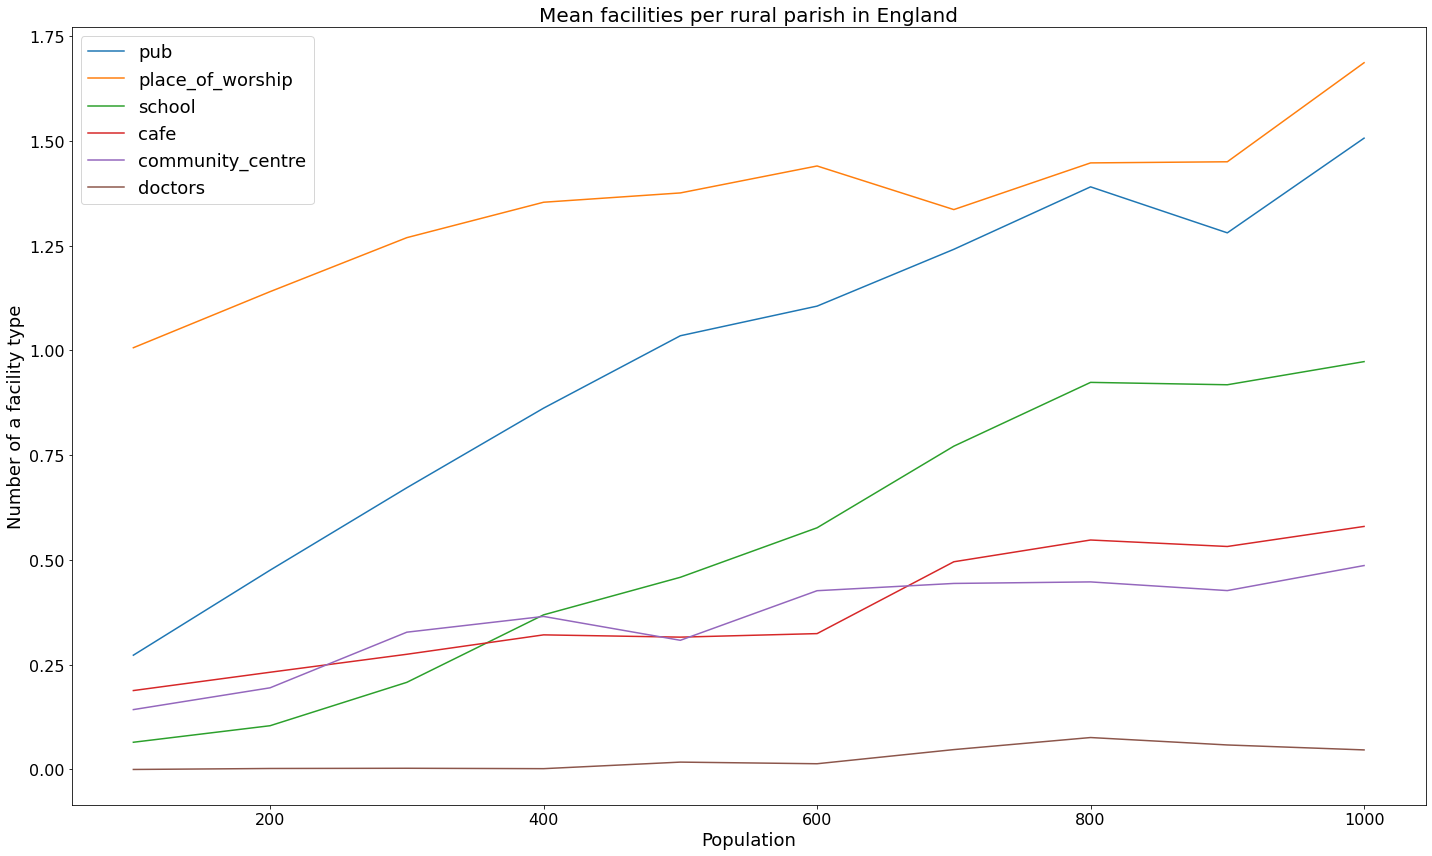

In [103]:
fig, ax = plt.subplots(figsize=(20,12))
parished_only[parished_only.population_grouped <= 1000].groupby(['population_grouped']).agg('mean')[to_get].plot(ax=ax)
plt.xlabel('Population', fontsize=18)
plt.ylabel('Number of a facility type', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=18)
plt.title('Mean facilities per rural parish in England', fontsize=20)
plt.tight_layout()
plt.savefig('avg_facilities_per_rural_parish_small.png')
plt.show()

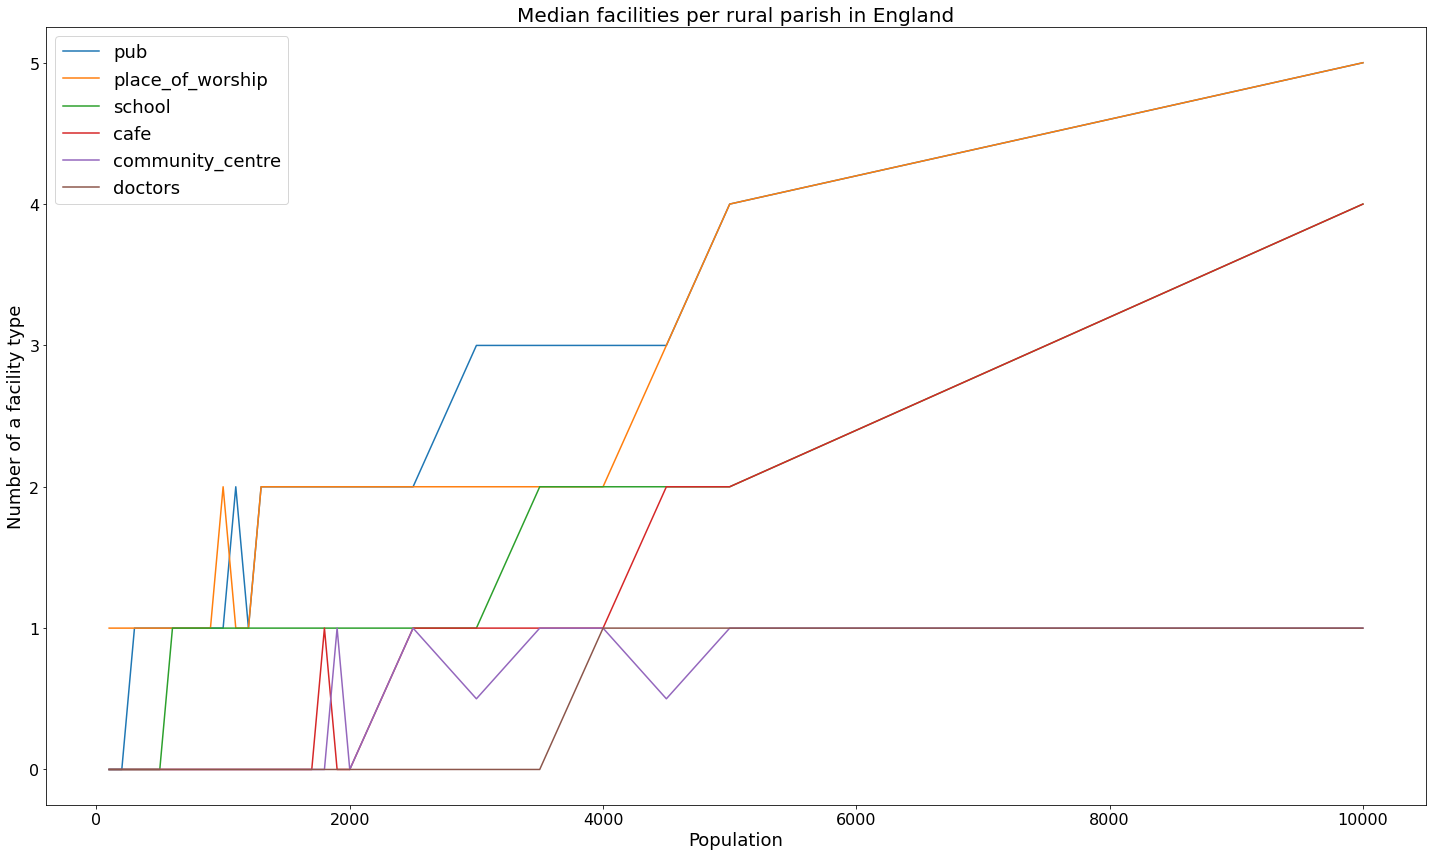

In [104]:
fig, ax = plt.subplots(figsize=(20,12))
parished_only.groupby(['population_grouped']).agg('median')[to_get].plot(ax=ax)
plt.xlabel('Population', fontsize=18)
plt.ylabel('Number of a facility type', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=18)
plt.title('Median facilities per rural parish in England', fontsize=20)
plt.tight_layout()
plt.savefig('median_facilities_per_rural_parish.png')
plt.show()

In [105]:
parished_only.head()

pub  place_of_worship  school  cafe  community_centre  doctors  \
2271    5                10       6     4                 4        2   
3089    7                11       5     3                 9        0   
3482   12                 9       7     7                 0        0   
1495    4                 3       5     3                 1        2   
3886    4                 2       3     2                 0        1   

      population                    name          county  population_grouped  
2271       12162  Heathfield and Waldron     East Sussex             10000.0  
3089       11192                Holbeach    Lincolnshire             10000.0  
3482       10866                Maryport         Cumbria             10000.0  
1495        9629                 Tiptree           Essex             10000.0  
3886        9403                  Yaxley  Cambridgeshire             10000.0

In [106]:
np.var(parished_only.pub)

2.211965459020285

In [107]:
np.mean(parished_only.pub)

1.2422029214370311

In [108]:
np.var(parished_only)

/opt/homebrew/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3755: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


pub                   2.211965e+00
place_of_worship      1.128257e+00
school                7.575878e-01
cafe                  2.682156e+00
community_centre      4.333332e-01
doctors               9.922450e-02
population            1.373422e+06
population_grouped    1.330249e+06
dtype: float64

In [109]:
mu = np.mean(parished_only.pub)
sigma_sqr = np.var(parished_only.pub)

n = mu**2 / (sigma_sqr - mu)
p = mu / sigma_sqr

In [69]:
n = 

0.4391199702523225

In [70]:
p

0.18482204458558238

In [75]:
mu

1.9367869256860932

In [76]:
sigma_sqr

10.479198680162087

In [110]:
from scipy.stats import nbinom

In [111]:
n = parished_only.pub.values
p = parished_only.pub.values / parished_only.population.values

In [82]:
nbinom(parished_only.pub.values, parished_only.pub.values / parished_only.population.values).ppf()

TypeError: ppf() missing 1 required positional argument: 'q'

In [85]:
parished_only.head()

pub  place_of_worship  school  cafe  community_centre  doctors  \
3617   39                40      39    36                 6        2   
1820   32                23      19    16                 1        4   
1263   36                29      23     6                 5        5   
6333   29                22      22    24                 7        4   
682    37                24      18    47                 6        7   

      population                  name          county  population_grouped  
3617       96702      Sutton Coldfield   West Midlands             95000.0  
1820       57414         Kidderminster  Worcestershire             55000.0  
1263       57354              Keighley  West Yorkshire             55000.0  
6333       54331               Banbury     Oxfordshire             55000.0  
682        50923  Royal Leamington Spa    Warwickshire             50000.0

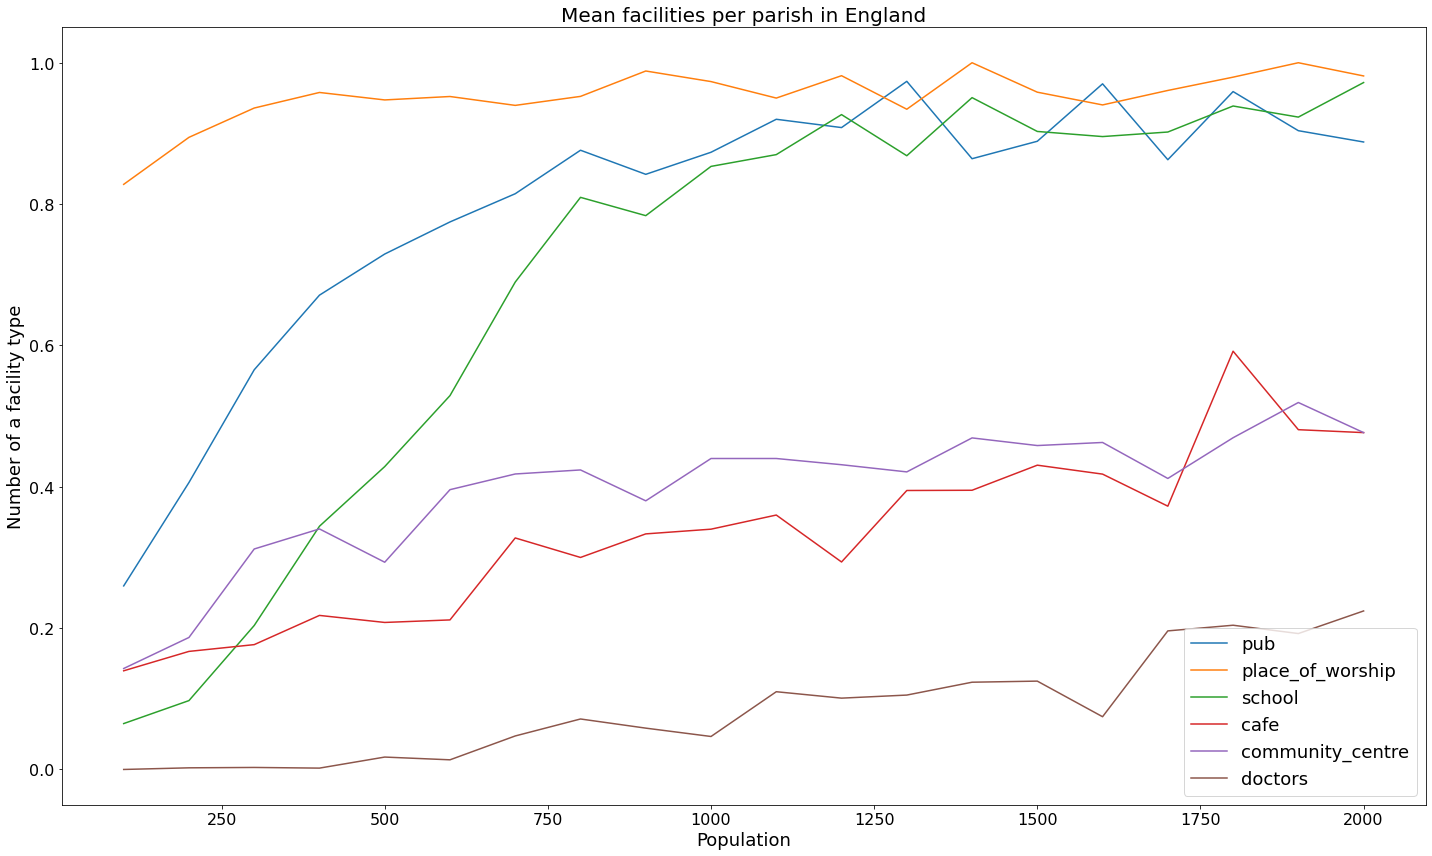

In [112]:
fig, ax = plt.subplots(figsize=(20,12))
small_parishes = parished_only[parished_only.population_grouped <= 2000]
for item in to_get:
    copy = small_parishes.copy()
    copy.loc[:, 'masked_item'] = copy[[item]] > 0
    copy.groupby(['population_grouped']).masked_item.agg('mean').plot(ax=ax, label=item)
plt.xlabel('Population', fontsize=18)
plt.ylabel('Number of a facility type', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=18)
plt.title('Mean facilities per parish in England', fontsize=20)
plt.tight_layout()
#plt.savefig('avg_facilities_per_parish_small.png')
plt.show()

In [95]:
d = np.random.poisson(9,100000)
d

array([11,  6,  9, ...,  8, 14,  7])

In [96]:
d[:10]

array([11,  6,  9,  7,  6, 10, 11,  8,  8,  7])

In [97]:
s = np.random.negative_binomial(3,0.25,100000)
s

array([ 9,  9,  7, ..., 16, 13, 18])

In [98]:
s[:10]

array([ 9,  9,  7,  1, 15,  9,  5,  5,  2,  3])

In [99]:
small_parishes.head()

pub  place_of_worship  school  cafe  community_centre  doctors  \
6210    3                 2       1     2                 0        1   
967     0                 0       2     1                 0        0   
817     2                 2       1     0                 0        0   
3753    3                 1       2     0                 1        0   
2069    3                 3       1     1                 1        0   

      population          name           county  population_grouped  
6210        2250      Berkeley  Gloucestershire              2000.0  
967         2248  Little Hoole       Lancashire              2000.0  
817         2240        Hapton       Lancashire              2000.0  
3753        2240     Old Leake     Lincolnshire              2000.0  
2069        2236        Weeley            Essex              2000.0

In [101]:
p

array([0.0004033 , 0.00055736, 0.00062768, ..., 0.00980392, 0.        ,
       0.        ])

In [113]:
import statsmodels.api as sm

In [114]:
res = sm.NegativeBinomial(small_parishes.pub, small_parishes.population).fit(start_parms=[1,1])
print(res.summary())

         Current function value: 1.268673
         Iterations: 28
         Function evaluations: 120
         Gradient evaluations: 110
                     NegativeBinomial Regression Results                      
Dep. Variable:                    pub   No. Observations:                 4614
Model:               NegativeBinomial   Df Residuals:                     4613
Method:                           MLE   Df Model:                            0
Date:                Thu, 05 Jan 2023   Pseudo R-squ.:                 0.03623
Time:                        17:00:21   Log-Likelihood:                -5853.7
converged:                      False   LL-Null:                       -6073.7
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
population     0.0003   1.49e-05     22.913      0.000       0.000       0

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method bfgs is: gtol, norm, epsilon. The list of unsupported keyword arguments passed include: start_parms. After release 0.14, this will raise.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:2651: RuntimeWarning: divide by zero encountered in log
  llf = coeff + size*np.log(prob) + endog*np.log(1-prob)
/opt/homebrew/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:2651: RuntimeWarning: invalid value encountered in multiply
  llf = coeff + size*np.log(prob) + endog*np.log(1-prob)
/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [115]:
mu = np.exp(res.params[0])

In [116]:
p = 1/(1 + np.exp(res.params[0])*res.params[1])
n = np.exp(res.params[0])*p/(1-p)

In [117]:
mu, p, n

(1.0003424258599116, 0.9999998362873951, 6110355.782308153)

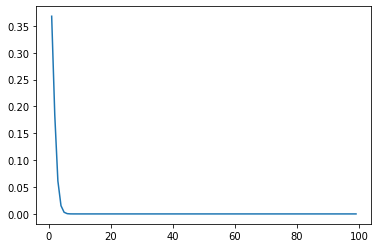

In [118]:
x = np.arange(1,100)
y = nbinom.pmf(x, n, p)
plt.plot(x, y)
plt.show()

In [119]:
small_parishes.pub.values

array([3, 3, 3, ..., 1, 0, 0])

In [120]:
small_parishes.population.values

array([2250, 2240, 2236, ...,  102,  101,  100])

/var/folders/zs/1hvc18dn7v94z77k1xy7g90c0000gn/T/ipykernel_34646/3516198067.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  really_small.loc[:, 'pub_mask'] = really_small.pub > 0


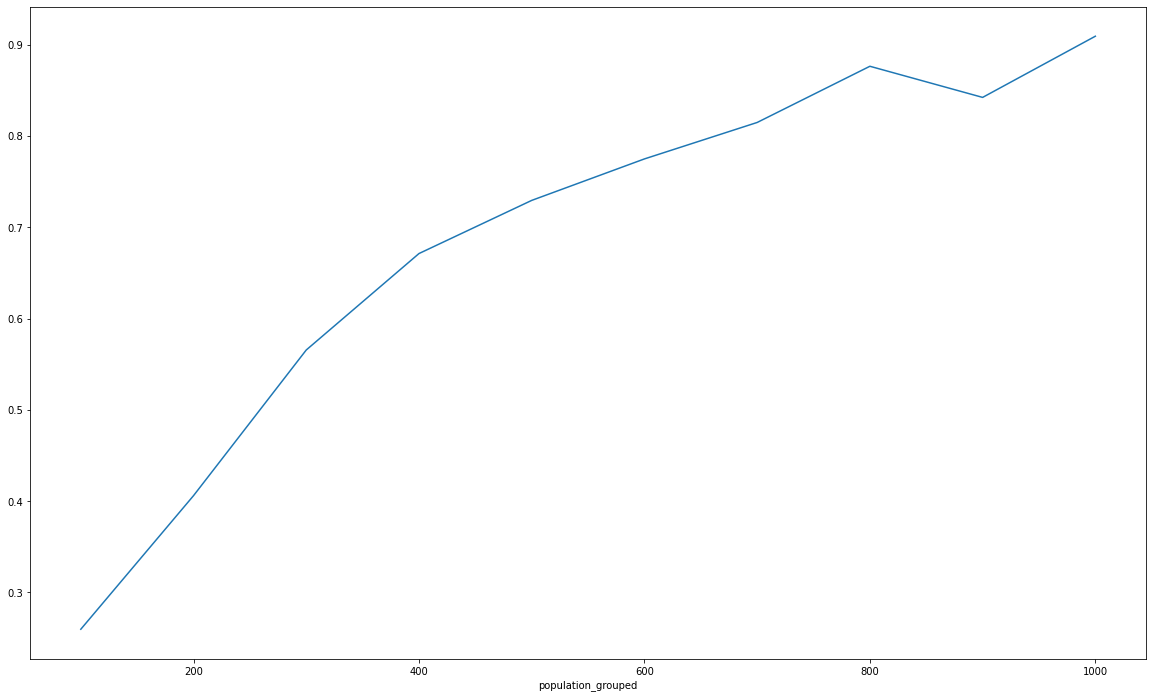

In [121]:
really_small = small_parishes[small_parishes.population <= 1000]
really_small.loc[:, 'pub_mask'] = really_small.pub > 0
fig, ax = plt.subplots(figsize=(20,12))
really_small.groupby(['population_grouped']).pub_mask.agg('mean').plot(ax=ax)
plt.show()

In [122]:
parished_only.head()

pub  place_of_worship  school  cafe  community_centre  doctors  \
2271    5                10       6     4                 4        2   
3089    7                11       5     3                 9        0   
3482   12                 9       7     7                 0        0   
1495    4                 3       5     3                 1        2   
3886    4                 2       3     2                 0        1   

      population                    name          county  population_grouped  
2271       12162  Heathfield and Waldron     East Sussex             10000.0  
3089       11192                Holbeach    Lincolnshire             10000.0  
3482       10866                Maryport         Cumbria             10000.0  
1495        9629                 Tiptree           Essex             10000.0  
3886        9403                  Yaxley  Cambridgeshire             10000.0

In [123]:
parished_only.groupby(['pub']).population.describe()

count         mean          std     min      25%     50%      75%  \
pub                                                                       
0    1590.0   398.113208   440.650593   100.0   178.00   267.0   430.75   
1    2021.0   660.905987   623.963279   102.0   292.00   465.0   811.00   
2     804.0  1173.508706   993.227924   126.0   508.00   887.5  1480.50   
3     352.0  1991.798295  1573.535429   174.0   872.25  1531.0  2704.50   
4     151.0  2437.655629  1779.486349   186.0  1178.00  1869.0  3248.00   
5      64.0  3361.250000  2310.663651   460.0  1818.25  2953.5  4015.00   
6      36.0  3458.111111  2366.774270   507.0  1449.25  2754.5  5095.25   
7      18.0  4520.722222  2512.076966  1774.0  2745.50  3725.5  5692.75   
8       8.0  4437.625000  1915.546094  1365.0  3202.25  5101.5  5385.00   
9       6.0  5011.000000  2522.488692  1327.0  3590.50  5085.0  6821.75   
10      3.0  5873.666667  2528.284860  3022.0  4890.00  6758.0  7299.50   
11      4.0  6106.500000   875.594084  5185.0  5729.50  5974.0  6351.00   
12      3.0  7928.333333  2812.688097  5260.0  6459.50  7659.0  9262.50   
15      1.0  7599.000000          NaN  7599.0  7599.00  7599.0  7599.00   
18      3.0  7652.666667  2760.676427  4465.0  6845.50  9226.0  9246.50   
22      1.0  7666.000000          NaN  7666.0  7666.00  7666.0  7666.00   
23      1.0  4275.000000          NaN  4275.0  4275.00  4275.0  4275.00   

         max  
pub           
0     5650.0  
1     6996.0  
2     9218.0  
3     8499.0  
4     9629.0  
5    12162.0  
6     9106.0  
7    11192.0  
8     7260.0  
9     8076.0  
10    7841.0  
11    7293.0  
12   10866.0  
15    7599.0  
18    9267.0  
22    7666.0  
23    4275.0

In [124]:
from scipy.stats import gaussian_kde

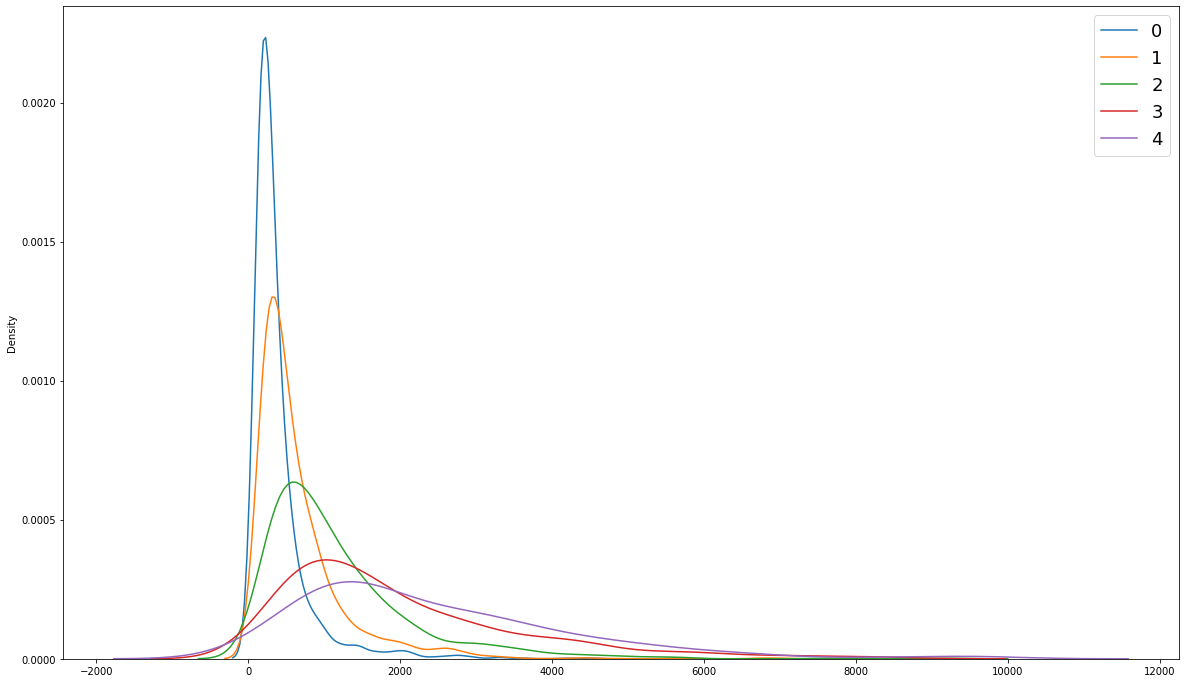

In [136]:
densities = []
fig, ax = plt.subplots(figsize=(20,12))
for i in range(5):
    pops = parished_only[parished_only.pub == i].population.values
    d = gaussian_kde(pops)
    xs = np.arange(1,5000)
    
    densities.append(d(xs))
    sns.kdeplot(np.array(pops), label=i)
    
plt.legend(fontsize=18)
plt.show()

In [137]:
densities

[array([4.86653774e-04, 4.94104839e-04, 5.01628323e-04, ...,
        7.95244302e-11, 7.60139877e-11, 7.26513917e-11]),
 array([2.73084161e-04, 2.76005564e-04, 2.78946616e-04, ...,
        9.46205379e-07, 9.39741904e-07, 9.33272849e-07]),
 array([1.85040787e-04, 1.85935700e-04, 1.86832873e-04, ...,
        9.11350923e-06, 9.10239628e-06, 9.09129787e-06]),
 array([1.24136959e-04, 1.24428406e-04, 1.24720154e-04, ...,
        3.66404007e-05, 3.66058500e-05, 3.65713658e-05]),
 array([9.41896827e-05, 9.43517361e-05, 9.45139222e-05, ...,
        6.14199414e-05, 6.13852481e-05, 6.13505654e-05])]

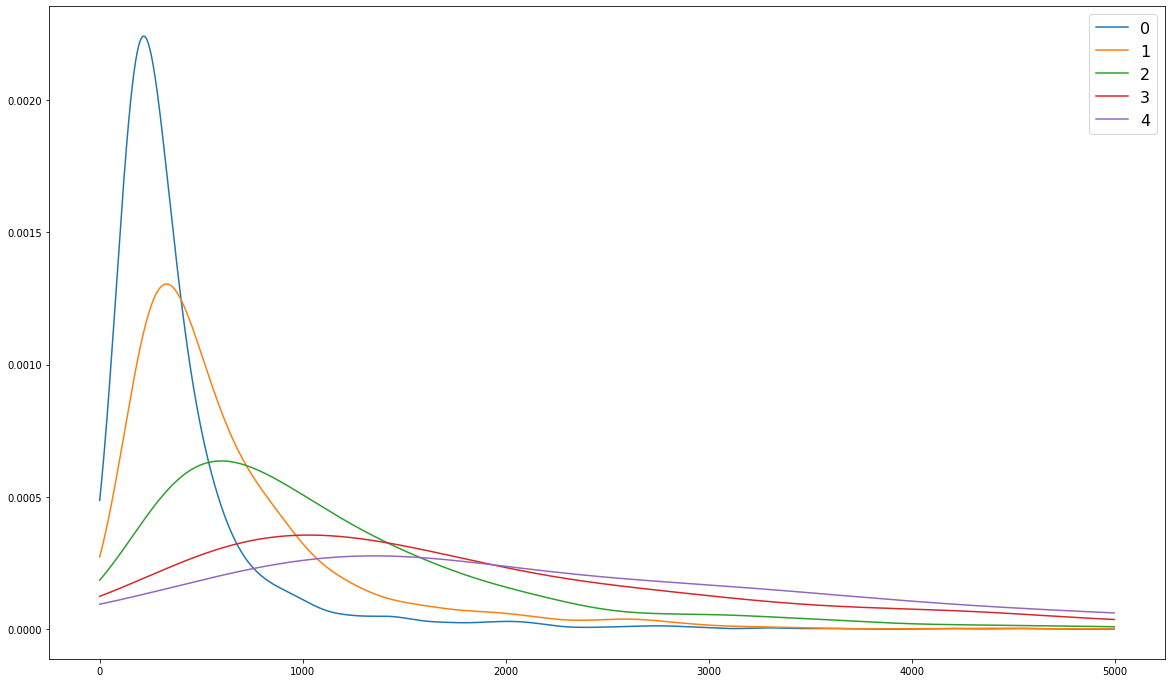

In [138]:
fig, ax = plt.subplots(figsize=(20,12))
for i, j in enumerate(densities):
    plt.plot(np.arange(len(j)), j, label=i)

plt.legend(fontsize=16)
plt.show()

In [139]:
big_array = np.array(densities)
print(big_array.shape)

(5, 4999)


In [140]:
big_array

array([[4.86653774e-04, 4.94104839e-04, 5.01628323e-04, ...,
        7.95244302e-11, 7.60139877e-11, 7.26513917e-11],
       [2.73084161e-04, 2.76005564e-04, 2.78946616e-04, ...,
        9.46205379e-07, 9.39741904e-07, 9.33272849e-07],
       [1.85040787e-04, 1.85935700e-04, 1.86832873e-04, ...,
        9.11350923e-06, 9.10239628e-06, 9.09129787e-06],
       [1.24136959e-04, 1.24428406e-04, 1.24720154e-04, ...,
        3.66404007e-05, 3.66058500e-05, 3.65713658e-05],
       [9.41896827e-05, 9.43517361e-05, 9.45139222e-05, ...,
        6.14199414e-05, 6.13852481e-05, 6.13505654e-05]])

In [141]:
normed = big_array / big_array.sum(axis=0)

In [142]:
normed[:,500]

array([0.26213407, 0.36124571, 0.21526482, 0.09727273, 0.06408267])

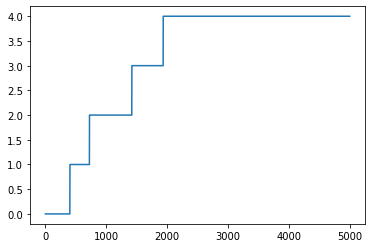

In [143]:
biggest_prob = np.argmax(normed, axis=0)
plt.plot(np.arange(len(biggest_prob)), biggest_prob)
plt.show()

In [144]:
lol = []
for row in normed.T:
    lol.append(np.sum([i*j for i,j in enumerate(row)]))


In [145]:
lol

[1.1970844490548072,
 1.1904476363579488,
 1.183868972977163,
 1.1773484137964145,
 1.170885902631189,
 1.1644813725206884,
 1.158134746018717,
 1.151845935483039,
 1.1456148433629794,
 1.1394413624850819,
 1.1333253763366335,
 1.1272667593468568,
 1.1212653771656256,
 1.1153210869395156,
 1.1094337375850556,
 1.103603170059031,
 1.0978292176257023,
 1.0921117061208157,
 1.0864504542122915,
 1.0808452736574776,
 1.075295969556874,
 1.0698023406042325,
 1.0643641793329444,
 1.0589812723586458,
 1.0536534006179712,
 1.048380339603387,
 1.0431618595940497,
 1.0379977258826534,
 1.0328876989982052,
 1.0278315349247036,
 1.0228289853156873,
 1.0178797977046259,
 1.0129837157111437,
 1.0081404792430437,
 1.0033498246941472,
 0.9986114851379172,
 0.9939251905168922,
 0.989290667827915,
 0.984707641303174,
 0.9801758325870737,
 0.9756949609089336,
 0.9712647432515601,
 0.9668848945156888,
 0.9625551276803448,
 0.9582751539591378,
 0.9540446829525265,
 0.9498634227960879,
 0.9457310803048288,
 

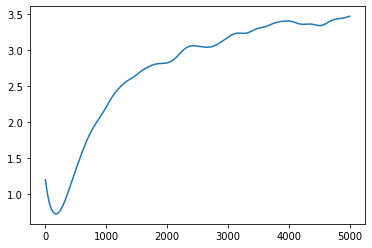

In [146]:
thingy = np.mean(normed, axis=0)
plt.plot(np.arange(len(biggest_prob)), lol)
plt.show()

In [147]:
parished_only.loc[:, 'pubs_per_person'] = parished_only.pub / parished_only.population
parished_only.pubs_per_person.describe()

count    5066.000000
mean        0.001871
std         0.002173
min         0.000000
25%         0.000000
50%         0.001317
75%         0.002797
max         0.021505
Name: pubs_per_person, dtype: float64

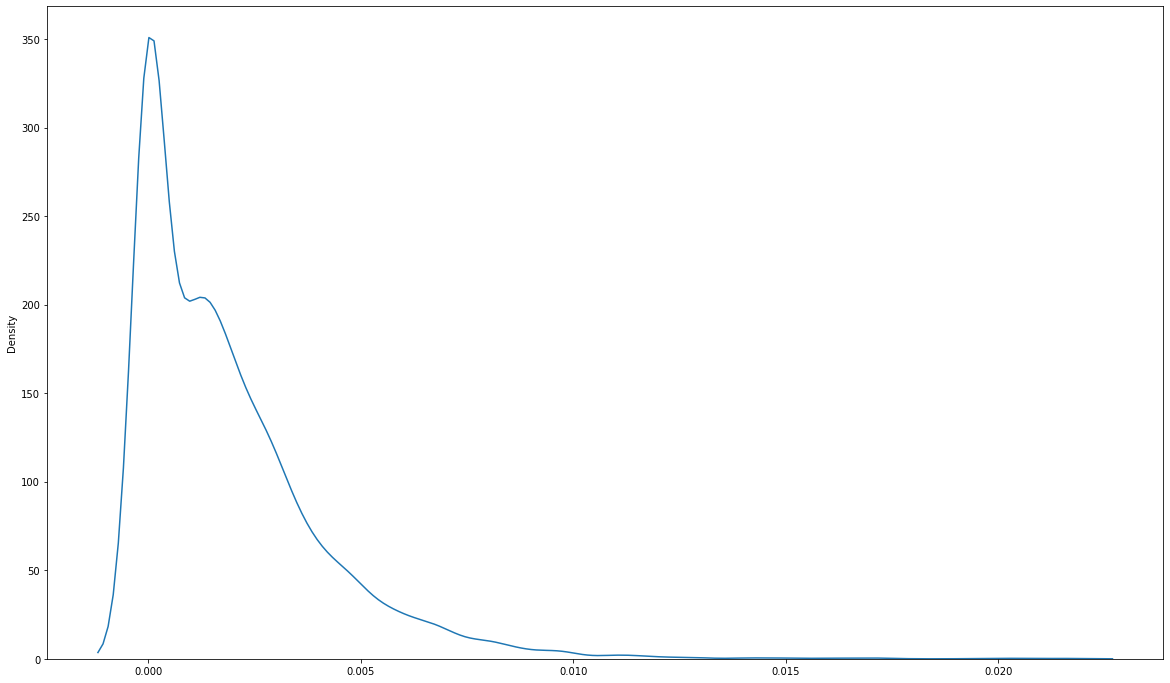

In [148]:
fig, ax = plt.subplots(figsize=(20,12))
sns.kdeplot(np.array(parished_only.pubs_per_person))
plt.show()

In [149]:
only_pubs = parished_only[parished_only.pub > 0]
only_pubs.loc[:, 'people_per_pub'] = only_pubs.population / only_pubs.pub
only_pubs.head()

/var/folders/zs/1hvc18dn7v94z77k1xy7g90c0000gn/T/ipykernel_34646/1821511768.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_pubs.loc[:, 'people_per_pub'] = only_pubs.population / only_pubs.pub


pub  place_of_worship  school  cafe  community_centre  doctors  \
2271    5                10       6     4                 4        2   
3089    7                11       5     3                 9        0   
3482   12                 9       7     7                 0        0   
1495    4                 3       5     3                 1        2   
3886    4                 2       3     2                 0        1   

      population                    name          county  population_grouped  \
2271       12162  Heathfield and Waldron     East Sussex             10000.0   
3089       11192                Holbeach    Lincolnshire             10000.0   
3482       10866                Maryport         Cumbria             10000.0   
1495        9629                 Tiptree           Essex             10000.0   
3886        9403                  Yaxley  Cambridgeshire             10000.0   

      pubs_per_person  people_per_pub  
2271         0.000411     2432.400000  
3089         0.000625     1598.857143  
3482         0.001104      905.500000  
1495         0.000415     2407.250000  
3886         0.000425     2350.750000

In [150]:
only_pubs.sort_values(by='people_per_pub').head(10)

pub  place_of_worship  school  cafe  community_centre  doctors  \
3573    4                 2       0     3                 1        0   
3359    4                 1       0     0                 1        0   
4232    4                 2       0     2                 0        0   
39      3                 1       0     1                 1        0   
3566    4                 2       1     1                 0        0   
4486    3                 1       1     0                 0        0   
3402    2                 2       0     0                 0        0   
1237    2                 1       0     0                 0        0   
3336    3                 1       0     0                 0        0   
4632    2                 0       0     0                 0        0   

      population                      name           county  \
3573         186  Barton and Pooley Bridge          Cumbria   
3359         196                 Wormshill             Kent   
4232         203   Brendon and Countisbury            Devon   
39           174                   Buckden  North Yorkshire   
3566         235                   Eskdale          Cumbria   
4486         184             Fenny Bentley       Derbyshire   
3402         126                  Snargate             Kent   
1237         133                    Exmoor         Somerset   
3336         204                Luddesdown             Kent   
4632         141              Nuthampstead    Hertfordshire   

      population_grouped  pubs_per_person  people_per_pub  
3573               200.0         0.021505       46.500000  
3359               200.0         0.020408       49.000000  
4232               200.0         0.019704       50.750000  
39                 200.0         0.017241       58.000000  
3566               200.0         0.017021       58.750000  
4486               200.0         0.016304       61.333333  
3402               100.0         0.015873       63.000000  
1237               100.0         0.015038       66.500000  
3336               200.0         0.014706       68.000000  
4632               100.0         0.014184       70.500000

In [151]:
only_pubs.sort_values(by='people_per_pub', ascending=False).head(10)

pub  place_of_worship  school  cafe  community_centre  doctors  \
2173    1                 4       2     1                 3        1   
4015    1                 1       1     2                 1        2   
3360    1                 5       1     1                 0        1   
2523    1                 6       1     1                 2        1   
2516    2                 4       3     5                 4        2   
2844    1                 1       2     1                 1        0   
733     1                 1       1     1                 0        0   
634     1                 1       0     3                 0        1   
3895    1                 1       1     2                 0        1   
1860    2                 6       3    11                 0        1   

      population             name           county  population_grouped  \
2173        6996  North Baddesley        Hampshire              5000.0   
4015        6849     Featherstone    Staffordshire              5000.0   
3360        6696      Staplehurst             Kent              5000.0   
2523        4871       Lakenheath          Suffolk              5000.0   
2516        9218          Brandon          Suffolk             10000.0   
2844        4485           Norton  South Yorkshire              4500.0   
733         4416            Earby       Lancashire              4500.0   
634         4272     East Horsley           Surrey              4500.0   
3895        3899         Bar Hill   Cambridgeshire              4000.0   
1860        7541           Cromer          Norfolk             10000.0   

      pubs_per_person  people_per_pub  
2173         0.000143          6996.0  
4015         0.000146          6849.0  
3360         0.000149          6696.0  
2523         0.000205          4871.0  
2516         0.000217          4609.0  
2844         0.000223          4485.0  
733          0.000226          4416.0  
634          0.000234          4272.0  
3895         0.000256          3899.0  
1860         0.000265          3770.5

In [152]:
only_schools = parished_only[parished_only.school > 0]
only_schools.head()

pub  place_of_worship  school  cafe  community_centre  doctors  \
2271    5                10       6     4                 4        2   
3089    7                11       5     3                 9        0   
3482   12                 9       7     7                 0        0   
1495    4                 3       5     3                 1        2   
3886    4                 2       3     2                 0        1   

      population                    name          county  population_grouped  \
2271       12162  Heathfield and Waldron     East Sussex             10000.0   
3089       11192                Holbeach    Lincolnshire             10000.0   
3482       10866                Maryport         Cumbria             10000.0   
1495        9629                 Tiptree           Essex             10000.0   
3886        9403                  Yaxley  Cambridgeshire             10000.0   

      pubs_per_person  
2271         0.000411  
3089         0.000625  
3482         0.001104  
1495         0.000415  
3886         0.000425

In [153]:
only_schools.loc[:, 'people_per_school'] = only_schools.population / only_schools.school
only_schools.sort_values(by='people_per_school').head()

/var/folders/zs/1hvc18dn7v94z77k1xy7g90c0000gn/T/ipykernel_34646/442122470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_schools.loc[:, 'people_per_school'] = only_schools.population / only_schools.school


pub  place_of_worship  school  cafe  community_centre  doctors  \
4925    0                 2       3     0                 0        0   
801     0                 1       2     0                 1        0   
4700    0                 1       2     0                 0        0   
21      1                 1       2     1                 0        0   
3484    1                 0       2     1                 0        0   

      population                  name           county  population_grouped  \
4925         191              Elsfield      Oxfordshire               200.0   
801          156             Bleasdale       Lancashire               200.0   
4700         159              Hatherop  Gloucestershire               200.0   
21           190  Stirton with Thorlby  North Yorkshire               200.0   
3484         216             Winscales          Cumbria               200.0   

      pubs_per_person  people_per_school  
4925         0.000000          63.666667  
801          0.000000          78.000000  
4700         0.000000          79.500000  
21           0.005263          95.000000  
3484         0.004630         108.000000

In [154]:
only_schools.sort_values(by='people_per_school', ascending=False).head()

pub  place_of_worship  school  cafe  community_centre  doctors  \
3768    3                 5       1     4                 2        1   
1497    3                 2       1     6                 2        0   
4015    1                 1       1     2                 1        2   
3360    1                 5       1     1                 0        1   
1500    3                 2       1     2                 1        1   

      population                        name         county  \
3768        7245  Storrington and Sullington    West Sussex   
1497        7226                 West Mersea          Essex   
4015        6849                Featherstone  Staffordshire   
3360        6696                 Staplehurst           Kent   
1500        6449         North Weald Bassett          Essex   

      population_grouped  pubs_per_person  people_per_school  
3768              5000.0         0.000414             7245.0  
1497              5000.0         0.000415             7226.0  
4015              5000.0         0.000146             6849.0  
3360              5000.0         0.000149             6696.0  
1500              5000.0         0.000465             6449.0

In [155]:
parished_only.groupby(['county']).population.describe().sort_values(by='50%')

count         mean          std     min      25%     50%  \
county                                                                         
North Yorkshire     482.0   562.634855   793.308619   102.0   200.00   311.5   
Lincolnshire        373.0   732.184987  1058.591390   103.0   214.00   369.0   
Suffolk             372.0   671.139785   892.552080   100.0   214.00   375.5   
Gloucestershire     183.0   643.016393   702.096081   104.0   242.50   385.0   
South Yorkshire      51.0   980.254902  1167.135722   127.0   195.00   393.0   
Nottinghamshire     157.0   830.464968  1204.231123   111.0   244.00   394.0   
Greater Manchester    2.0   406.000000    90.509668   342.0   374.00   406.0   
Warwickshire        151.0   777.635762   933.058337   109.0   231.50   430.0   
Cumbria             237.0   952.295359  1449.667714   104.0   292.00   439.0   
Oxfordshire         222.0   700.612613   753.209154   110.0   267.25   444.0   
Derbyshire          145.0   834.310345   991.152111   105.0   242.00   477.0   
Norfolk             430.0   789.118605   937.594555   108.0   289.50   489.0   
Devon               347.0   848.348703  1008.290921   105.0   296.50   513.0   
Somerset            268.0   782.932836   841.962686   101.0   285.50   516.5   
Worcestershire      142.0   847.612676  1110.683419   107.0   272.25   527.5   
Staffordshire       120.0  1132.191667  1499.696077   123.0   282.50   547.5   
Leicestershire      139.0   888.604317   996.284959   114.0   274.50   566.0   
Hertfordshire        78.0   975.358974  1081.494336   119.0   295.50   606.5   
Hampshire           172.0  1164.709302  1414.729134   116.0   363.00   654.5   
Cambridgeshire      175.0  1209.760000  1502.570632   103.0   345.50   655.0   
Essex               218.0  1189.839450  1378.913353   116.0   375.25   720.0   
Lancashire          124.0  1248.935484  1469.738142   120.0   305.00   725.5   
West Sussex          93.0  1315.591398  1327.576881   113.0   348.00   828.0   
East Sussex          73.0  1494.931507  1811.110865   165.0   421.00   859.0   
Kent                210.0  1489.466667  1550.676213   116.0   466.50   929.5   
Surrey               48.0  1649.312500  1631.121480   176.0   586.50   942.5   
Tyne and Wear         2.0  1237.000000   169.705627  1117.0  1177.00  1237.0   
West Yorkshire       44.0  2143.295455  2162.419764   148.0   695.25  1603.5   
West Midlands         5.0  1934.400000  1281.061006   590.0   737.00  1899.0   
Merseyside            3.0  2769.000000  2760.218651   462.0  1240.00  2018.0   

                        75%      max  
county                                
North Yorkshire      582.75   8076.0  
Lincolnshire         765.00  11192.0  
Suffolk              727.25   9218.0  
Gloucestershire      744.00   5628.0  
South Yorkshire     1344.50   5161.0  
Nottinghamshire      852.00   8144.0  
Greater Manchester   438.00    470.0  
Warwickshire        1040.00   6037.0  
Cumbria              845.00  10866.0  
Oxfordshire          805.00   5321.0  
Derbyshire           971.00   5208.0  
Norfolk              924.75   8012.0  
Devon                979.50   8210.0  
Somerset             968.50   7335.0  
Worcestershire       878.25   9267.0  
Staffordshire       1219.25   8326.0  
Leicestershire      1067.00   5373.0  
Hertfordshire       1194.00   5642.0  
Hampshire           1249.50   6996.0  
Cambridgeshire      1414.50   9403.0  
Essex               1426.50   9629.0  
Lancashire          1535.75   8303.0  
West Sussex         1904.00   7245.0  
East Sussex         1836.00  12162.0  
Kent                1832.75   8499.0  
Surrey              2565.50   8055.0  
Tyne and Wear       1297.00   1357.0  
West Yorkshire      2639.50   9226.0  
West Midlands       3200.00   3246.0  
Merseyside          3922.50   5827.0

In [170]:
county_sizes = parished_only.groupby(['county']).size().reset_index()
county_sizes.columns = ['county', 'num_wholly_rural_parishes']
rural_counties = county_sizes[county_sizes.num_wholly_rural_parishes >= 40].county.values

In [171]:
real_rural_counties = parished_only[parished_only.county.isin(rural_counties)]

pub  place_of_worship  school  cafe  community_centre  doctors  \
2271    5                10       6     4                 4        2   
3089    7                11       5     3                 9        0   
3482   12                 9       7     7                 0        0   
1495    4                 3       5     3                 1        2   
3886    4                 2       3     2                 0        1   

      population                    name          county  population_grouped  \
2271       12162  Heathfield and Waldron     East Sussex             10000.0   
3089       11192                Holbeach    Lincolnshire             10000.0   
3482       10866                Maryport         Cumbria             10000.0   
1495        9629                 Tiptree           Essex             10000.0   
3886        9403                  Yaxley  Cambridgeshire             10000.0   

      pubs_per_person  
2271         0.000411  
3089         0.000625  
3482         0.001104  
1495         0.000415  
3886         0.000425

### Generating a procedure for Gaussian KDE

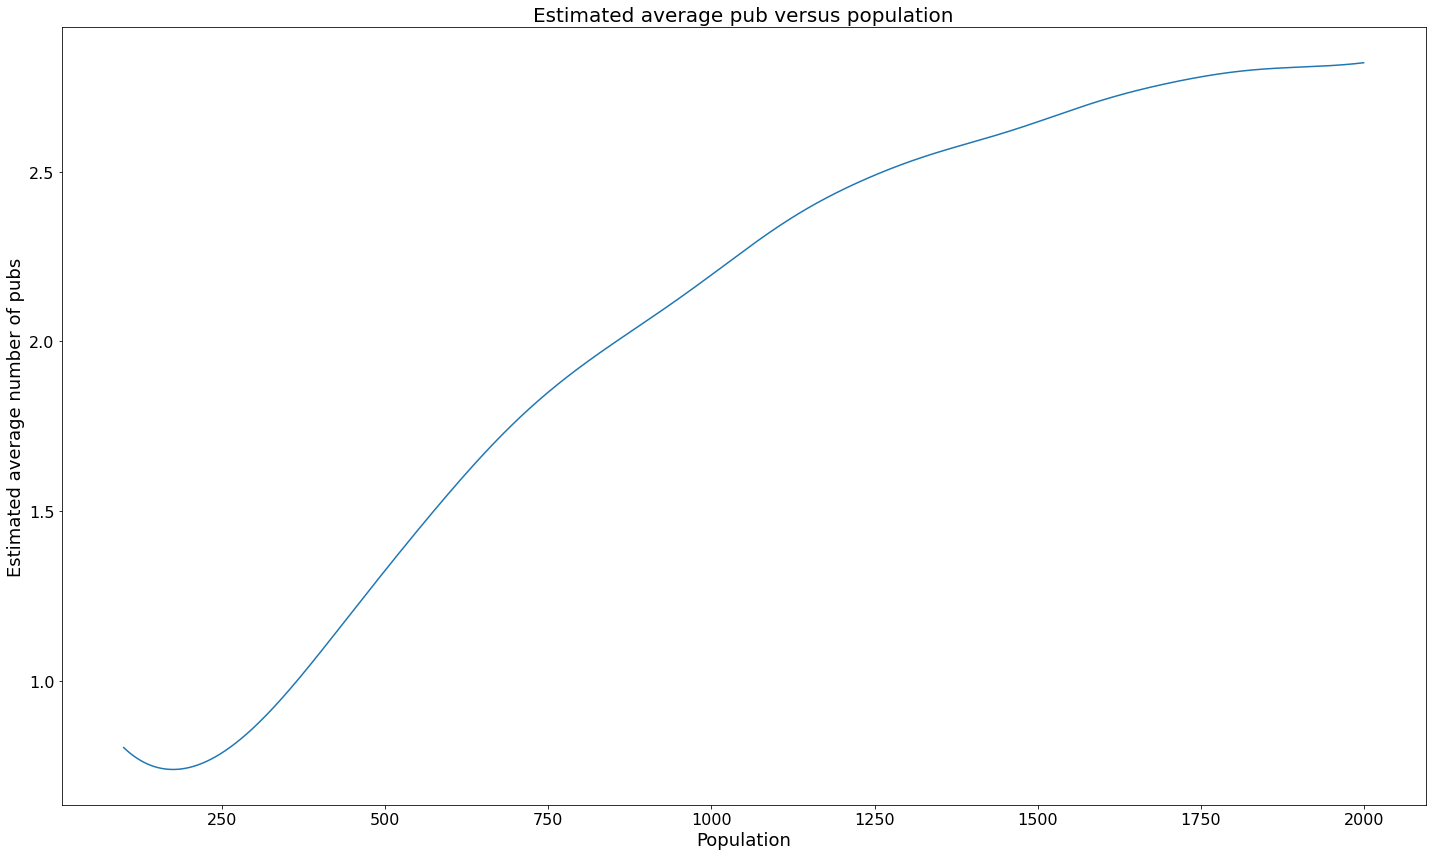

In [157]:
N = 5
facility_type = 'pub'
frame = parished_only
pop_range = np.arange(100,2000)
method = 'silverman'
d_frame = []
other_d_frame = []

for i in range(N):
    pops = frame[frame[facility_type] == i].population.values
    d = gaussian_kde(pops, bw_method=method)
    d_frame.append(d(pop_range))
    
big_array = np.array(d_frame)
normed_array = big_array / big_array.sum(axis=0)
estimated_averages = []
for row in normed_array.T:
    estimated_averages.append(np.sum([i*j for i, j in enumerate(row)]))
    
fig, ax = plt.subplots(figsize=(20,12))
plt.plot(pop_range, estimated_averages)
plt.xlabel('Population', fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel('Estimated average number of {0}s'.format(facility_type), fontsize=18)
plt.yticks(fontsize=16)
plt.title("Estimated average {0} versus population".format(facility_type), fontsize=20)
plt.tight_layout()
plt.show()

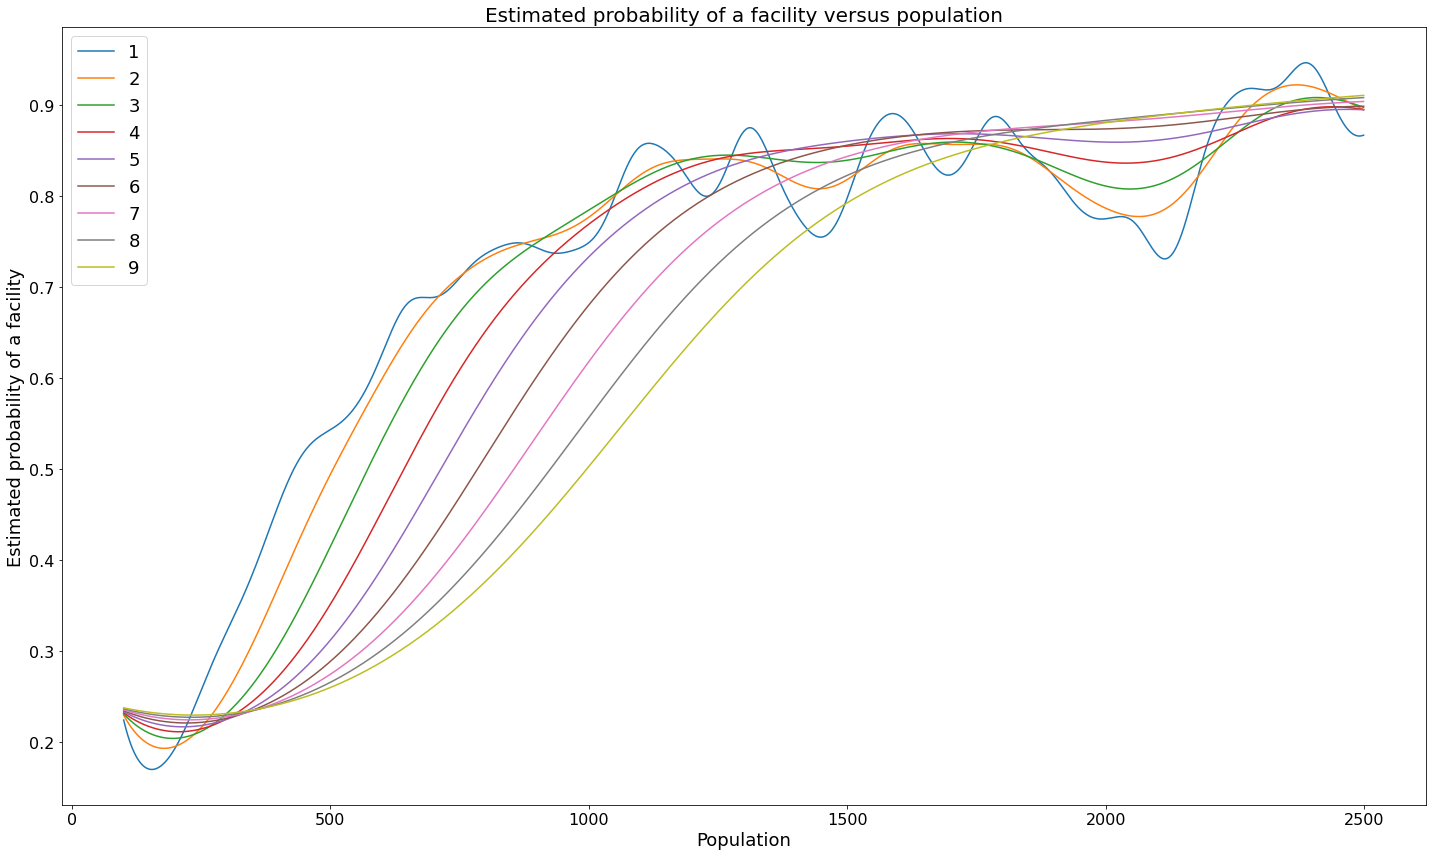

In [161]:
N = 2
facility_type = 'school'
frame = parished_only
pop_range = np.arange(100,2500)
method = 'silverman'
d_frame = []
aha = []

def get_average(frame, facility_type, pop_range, N, method='silverman', bool_problem = False):
    d_frame = []
    if bool_problem:
        pop_no = frame[frame[facility_type] == 0].population.values
        d_no = gaussian_kde(pop_no, bw_method=method)
        d_frame.append(d_no(pop_range))
        pop_yes = frame[frame[facility_type] > 0].population.values
        d_yes = gaussian_kde(pop_yes, bw_method=method)
        d_frame.append(d_yes(pop_range))
    else:
        for i in range(N):
            pops = frame[frame[facility_type] == i].population.values
            d = gaussian_kde(pops, bw_method=method)
            d_frame.append(d(pop_range))

    big_array = np.array(d_frame)
    normed_array = big_array / big_array.sum(axis=0)
    estimated_averages = []
    for row in normed_array.T:
        estimated_averages.append(np.sum([i*j for i, j in enumerate(row)]))
        aha.append([row])
    return estimated_averages

fig, ax = plt.subplots(figsize=(20,12))
for fac in range(1,10):
    avgs = get_average(
        parished_only,
        'pub',
        pop_range,
        10,
        fac/10,
        bool_problem=True
    )
    plt.plot(pop_range, avgs, label=fac)
plt.xlabel('Population', fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel('Estimated probability of a facility', fontsize=18)
plt.yticks(fontsize=16)
plt.title("Estimated probability of a facility versus population", fontsize=20)
plt.legend(fontsize=18)
plt.tight_layout()
plt.show()

In [162]:
parished_only[parished_only.population <= 150].agg('mean')

/var/folders/zs/1hvc18dn7v94z77k1xy7g90c0000gn/T/ipykernel_34646/2890967075.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  parished_only[parished_only.population <= 150].agg('mean')


pub                     0.278997
place_of_worship        1.012539
school                  0.068966
cafe                    0.188088
community_centre        0.141066
doctors                 0.000000
population            130.050157
population_grouped    103.448276
pubs_per_person         0.002146
dtype: float64

In [163]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [164]:
lr.fit(parished_only.population.values.reshape(-1,1), parished_only.pub.values)

LinearRegression()

In [165]:
lr.coef_

array([0.0008027])

## By County groups

In [184]:
real_rural_counties[real_rural_counties.population <= 1000].groupby(['county']).size().sort_values()

county
West Yorkshire      15
Surrey              25
South Yorkshire     33
East Sussex         38
West Sussex         50
Hertfordshire       54
Lancashire          77
Staffordshire       80
Leicestershire     102
Kent               108
Worcestershire     111
Derbyshire         112
Warwickshire       112
Cambridgeshire     116
Hampshire          121
Nottinghamshire    123
Essex              140
Gloucestershire    148
Cumbria            181
Oxfordshire        183
Somerset           203
Devon              265
Lincolnshire       308
Suffolk            312
Norfolk            335
North Yorkshire    420
dtype: int64

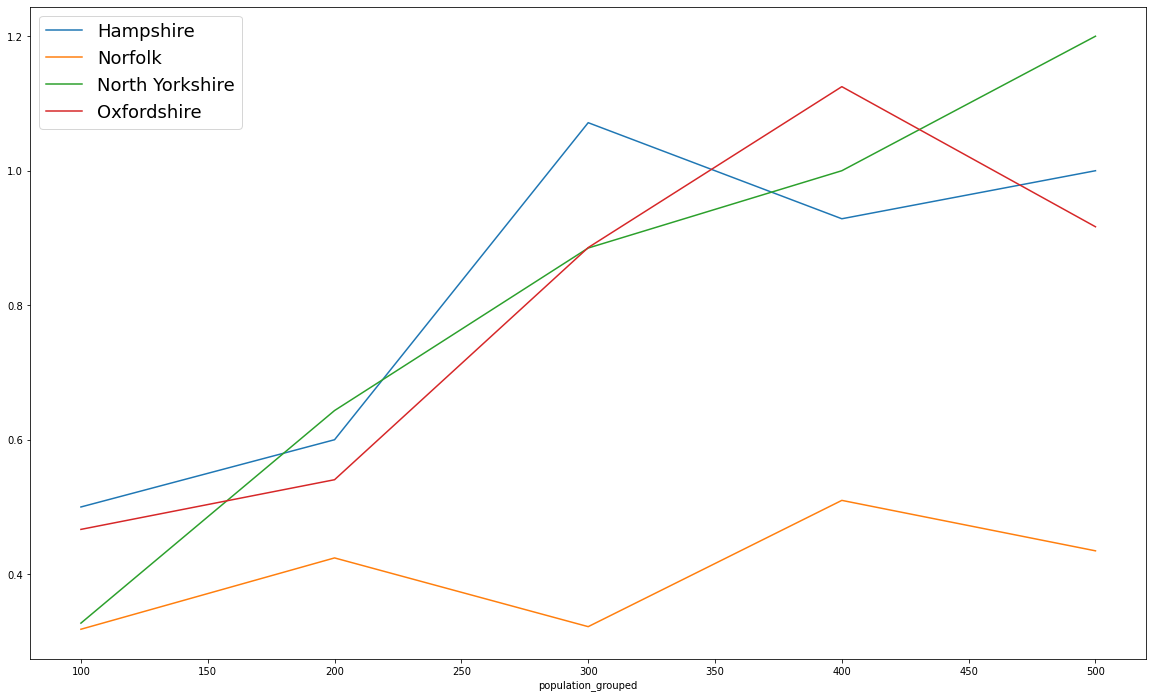

In [284]:
county_list = [
    'North Yorkshire',
    'Norfolk',
    'Oxfordshire',
    'Hampshire'
]

pop_range = np.arange(100,2500)
fig, ax = plt.subplots(figsize=(20,12))
for county, frame in real_rural_counties[(real_rural_counties.county.isin(county_list)) & (real_rural_counties.population <= 500)].groupby(['county']):
    frame.groupby(['population_grouped']).pub.agg('mean').plot(ax=ax, label=county)
    
plt.legend(fontsize=18)
plt.show()

In [190]:
to_get

['pub', 'place_of_worship', 'school', 'cafe', 'community_centre', 'doctors']

### IMD

In [196]:
imd = pd.read_csv('imd_lookup.csv')
imd.head()

_LSOA11CD                   LSOA11NM    LAD19CD               LAD19NM  \
0  E01000001        City of London 001A  E09000001        City of London   
1  E01000002        City of London 001B  E09000001        City of London   
2  E01000003        City of London 001C  E09000001        City of London   
3  E01000005        City of London 001E  E09000001        City of London   
4  E01000006  Barking and Dagenham 016A  E09000002  Barking and Dagenham   

    IMD19  OBJECTID  
0  29,199         0  
1  30,379         1  
2  14,915         2  
3   8,678         3  
4  14,486         4

In [197]:
big_lookup.columns

Index(['ObjectId_x', 'OA21CD', 'PAR22CD', 'PAR22NM', 'PAR22NMW', 'LTLA22CD',
       'LTLA22NM', 'LTLA22NMW', 'UTLA22CD', 'UTLA22NM', 'UTLA22NMW', 'RGN22CD',
       'RGN22NM', 'RGN22NMW', 'CTRY22CD', 'CTRY22NM', 'CTRY22NMW', 'NAT22CD',
       'NAT22NM', 'NAT22NMW', 'ObjectId_y', 'OA11CD', 'LAD22CD', 'LAD22NM',
       'LAD22NMW', 'RUC11CD', 'RUC11', 'BOUND_CHGIND', 'ASSIGN_CHGIND',
       'ASSIGN_CHREASON'],
      dtype='object')

In [198]:
big_lookup.head()

ObjectId_x     OA21CD    PAR22CD        PAR22NM PAR22NMW   LTLA22CD  \
0           1  E00060311  E04000255  Dalton Piercy      NaN  E06000001   
1           2  E00060356  E04000257       Greatham      NaN  E06000001   
2           3  E00060360  E04000257       Greatham      NaN  E06000001   
3           4  E00060357  E04000257       Greatham      NaN  E06000001   
4           5  E00060359  E04000257       Greatham      NaN  E06000001   

     LTLA22NM LTLA22NMW   UTLA22CD    UTLA22NM  ... ObjectId_y     OA11CD  \
0  Hartlepool       NaN  E06000001  Hartlepool  ...    58645.0  E00060311   
1  Hartlepool       NaN  E06000001  Hartlepool  ...    58716.0  E00060356   
2  Hartlepool       NaN  E06000001  Hartlepool  ...    58749.0  E00060360   
3  Hartlepool       NaN  E06000001  Hartlepool  ...    58720.0  E00060357   
4  Hartlepool       NaN  E06000001  Hartlepool  ...    58728.0  E00060359   

     LAD22CD     LAD22NM LAD22NMW RUC11CD                  RUC11 BOUND_CHGIND  \
0  E06000001  Hartlepool      NaN      E1          Rural village            U   
1  E06000001  Hartlepool      NaN      C1    Urban city and town            U   
2  E06000001  Hartlepool      NaN      C1    Urban city and town            U   
3  E06000001  Hartlepool      NaN      D1  Rural town and fringe            U   
4  E06000001  Hartlepool      NaN      C1    Urban city and town            U   

  ASSIGN_CHGIND ASSIGN_CHREASON  
0           NaN             NaN  
1           NaN             NaN  
2           NaN             NaN  
3           NaN             NaN  
4           NaN             NaN  

[5 rows x 30 columns]

In [231]:
more_lookup = pd.read_csv(
    'Output_Area_to_Lower_layer_Super_Output_Area_to_Middle_layer_Super_Output_Area_to_Local_Authority_District_(December_2011)_Lookup_in_England_and_Wales.csv',
    thousands=","
)
more_lookup.head()

/var/folders/zs/1hvc18dn7v94z77k1xy7g90c0000gn/T/ipykernel_34646/733651442.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  more_lookup = pd.read_csv(


OA11CD   LSOA11CD             LSOA11NM   MSOA11CD            MSOA11NM  \
0  E00000001  E01000001  City of London 001A  E02000001  City of London 001   
1  E00000003  E01000001  City of London 001A  E02000001  City of London 001   
2  E00000005  E01000001  City of London 001A  E02000001  City of London 001   
3  E00000007  E01000001  City of London 001A  E02000001  City of London 001   
4  E00000010  E01000003  City of London 001C  E02000001  City of London 001   

     LAD11CD         LAD11NM LAD11NMW  ObjectId  
0  E09000001  City of London      NaN         1  
1  E09000001  City of London      NaN         2  
2  E09000001  City of London      NaN         3  
3  E09000001  City of London      NaN         4  
4  E09000001  City of London      NaN         5

In [243]:
small_lookup = big_lookup[['OA11CD', 'OA21CD', 'PAR22NM', 'PAR22CD', 'RUC11']].merge(more_lookup[['OA11CD', 'LSOA11CD']], how='inner', on='OA11CD')

In [244]:
small_lookup.head()

OA11CD     OA21CD        PAR22NM    PAR22CD                  RUC11  \
0  E00060311  E00060311  Dalton Piercy  E04000255          Rural village   
1  E00060356  E00060356       Greatham  E04000257    Urban city and town   
2  E00060360  E00060360       Greatham  E04000257    Urban city and town   
3  E00060357  E00060357       Greatham  E04000257  Rural town and fringe   
4  E00060359  E00060359       Greatham  E04000257    Urban city and town   

    LSOA11CD  
0  E01011959  
1  E01011968  
2  E01011968  
3  E01011968  
4  E01011968

In [245]:
small_lookup[['LSOA11CD', 'PAR22NM']].groupby(['PAR22NM']).size().sort_values(ascending=False).head(10)

PAR22NM
Birmingham, unparished area                             2886
Leeds, unparished area                                  1990
Sheffield, unparished area                              1605
Liverpool, unparished area                              1584
Manchester, unparished area                             1530
Bristol, City of, unparished area                       1368
Croydon, unparished area                                1132
Bournemouth, Christchurch and Poole, unparished area    1073
Wirral, unparished area                                 1071
Barnet, unparished area                                 1036
dtype: int64

In [246]:
small_lookup[small_lookup.PAR22NM == 'Heathfield and Waldron']

OA11CD     OA21CD                 PAR22NM    PAR22CD  \
54856  E00107663  E00107663  Heathfield and Waldron  E04003847   
54857  E00107433  E00107433  Heathfield and Waldron  E04003847   
54858  E00107664  E00107664  Heathfield and Waldron  E04003847   
54859  E00107658  E00107658  Heathfield and Waldron  E04003847   
54860  E00107432  E00107432  Heathfield and Waldron  E04003847   
54861  E00107633  E00107633  Heathfield and Waldron  E04003847   
54862  E00107632  E00107632  Heathfield and Waldron  E04003847   
54863  E00107436  E00107436  Heathfield and Waldron  E04003847   
54864  E00107653  E00107653  Heathfield and Waldron  E04003847   
54865  E00107645  E00107645  Heathfield and Waldron  E04003847   
54866  E00107667  E00107667  Heathfield and Waldron  E04003847   
54867  E00107657  E00107657  Heathfield and Waldron  E04003847   
54868  E00107642  E00107642  Heathfield and Waldron  E04003847   
54869  E00107553  E00107553  Heathfield and Waldron  E04003847   
54870  E00107661  E00107661  Heathfield and Waldron  E04003847   
54871  E00107643  E00107643  Heathfield and Waldron  E04003847   
54872  E00107666  E00107666  Heathfield and Waldron  E04003847   
54875  E00107659  E00107659  Heathfield and Waldron  E04003847   
54876  E00107552  E00107552  Heathfield and Waldron  E04003847   
54877  E00107434  E00107434  Heathfield and Waldron  E04003847   
54878  E00107640  E00107640  Heathfield and Waldron  E04003847   
54879  E00107647  E00107647  Heathfield and Waldron  E04003847   
54880  E00107435  E00107435  Heathfield and Waldron  E04003847   
54881  E00107662  E00107662  Heathfield and Waldron  E04003847   
54882  E00107660  E00107660  Heathfield and Waldron  E04003847   
54883  E00107641  E00107641  Heathfield and Waldron  E04003847   
54884  E00107651  E00107651  Heathfield and Waldron  E04003847   
54885  E00107656  E00107656  Heathfield and Waldron  E04003847   
54886  E00107634  E00107634  Heathfield and Waldron  E04003847   
54887  E00107654  E00107654  Heathfield and Waldron  E04003847   
54888  E00107644  E00107644  Heathfield and Waldron  E04003847   
54889  E00107649  E00107649  Heathfield and Waldron  E04003847   
54890  E00107646  E00107646  Heathfield and Waldron  E04003847   
54891  E00107652  E00107652  Heathfield and Waldron  E04003847   
54892  E00107431  E00107431  Heathfield and Waldron  E04003847   
54893  E00107635  E00107635  Heathfield and Waldron  E04003847   
54894  E00107650  E00107650  Heathfield and Waldron  E04003847   
54895  E00107655  E00107655  Heathfield and Waldron  E04003847   
54897  E00107665  E00107665  Heathfield and Waldron  E04003847   
54898  E00107648  E00107648  Heathfield and Waldron  E04003847   

                                      RUC11   LSOA11CD  
54856                         Rural village  E01021190  
54857                 Rural town and fringe  E01021150  
54858                         Rural village  E01021190  
54859                 Rural town and fringe  E01021193  
54860                         Rural village  E01021149  
54861  Rural hamlets and isolated dwellings  E01021189  
54862  Rural hamlets and isolated dwellings  E01021189  
54863  Rural hamlets and isolated dwellings  E01021150  
54864                 Rural town and fringe  E01021193  
54865                 Rural town and fringe  E01021191  
54866                         Rural village  E01021190  
54867                 Rural town and fringe  E01021194  
54868                 Rural town and fringe  E01021194  
54869                         Rural village  E01021170  
54870                 Rural town and fringe  E01021193  
54871                 Rural town and fringe  E01021192  
54872                 Rural town and fringe  E01021190  
54875                 Rural town and fringe  E01021192  
54876  Rural hamlets and isolated dwellings  E01021170  
54877  Rural hamlets and isolated dwellings  E01021150  
54878                 Rural town and fringe  E01021194  
54879                 Rural town and fringe  E010

In [247]:
imd_framey = small_lookup.merge(imd, how='left', left_on='LSOA11CD', right_on='_LSOA11CD').drop_duplicates()
imd_framey.head()

OA11CD     OA21CD        PAR22NM    PAR22CD                  RUC11  \
0  E00060311  E00060311  Dalton Piercy  E04000255          Rural village   
1  E00060356  E00060356       Greatham  E04000257    Urban city and town   
2  E00060360  E00060360       Greatham  E04000257    Urban city and town   
3  E00060357  E00060357       Greatham  E04000257  Rural town and fringe   
4  E00060359  E00060359       Greatham  E04000257    Urban city and town   

    LSOA11CD  _LSOA11CD         LSOA11NM    LAD19CD     LAD19NM   IMD19  \
0  E01011959  E01011959  Hartlepool 014A  E06000001  Hartlepool  22,123   
1  E01011968  E01011968  Hartlepool 014D  E06000001  Hartlepool  14,530   
2  E01011968  E01011968  Hartlepool 014D  E06000001  Hartlepool  14,530   
3  E01011968  E01011968  Hartlepool 014D  E06000001  Hartlepool  14,530   
4  E01011968  E01011968  Hartlepool 014D  E06000001  Hartlepool  14,530   

   OBJECTID  
0   11604.0  
1   11613.0  
2   11613.0  
3   11613.0  
4   11613.0

In [248]:
imd_framey.dtypes

OA11CD        object
OA21CD        object
PAR22NM       object
PAR22CD       object
RUC11         object
LSOA11CD      object
_LSOA11CD     object
LSOA11NM      object
LAD19CD       object
LAD19NM       object
IMD19         object
OBJECTID     float64
dtype: object

In [249]:
useful_ind_frame = imd_framey[['PAR22NM', 'IMD19']].drop_duplicates()
useful_ind_frame.loc[:, 'better_imd'] = useful_ind_frame.IMD19.apply(lambda x: int(str(x).replace(',', '')))

ValueError: invalid literal for int() with base 10: 'nan'

In [250]:
real_rural_counties.head()

pub  place_of_worship  school  cafe  community_centre  doctors  \
2271    5                10       6     4                 4        2   
3089    7                11       5     3                 9        0   
3482   12                 9       7     7                 0        0   
1495    4                 3       5     3                 1        2   
3886    4                 2       3     2                 0        1   

      population                    name          county  population_grouped  \
2271       12162  Heathfield and Waldron     East Sussex             10000.0   
3089       11192                Holbeach    Lincolnshire             10000.0   
3482       10866                Maryport         Cumbria             10000.0   
1495        9629                 Tiptree           Essex             10000.0   
3886        9403                  Yaxley  Cambridgeshire             10000.0   

      pubs_per_person  
2271         0.000411  
3089         0.000625  
3482         0.001104  
1495         0.000415  
3886         0.000425

In [261]:
def convert_thing(x):
    if type(x) == str:
        return int(str(x).replace(',', ''))
    return None

In [262]:
handy_rural = real_rural_counties.merge(useful_ind_frame[['PAR22NM', 'IMD19']], how='inner', left_on='name', right_on='PAR22NM')
handy_rural.loc[:, 'useful_imd'] = handy_rural.IMD19.apply(convert_thing)
handy_rural.head()

pub  place_of_worship  school  cafe  community_centre  doctors  population  \
0    5                10       6     4                 4        2       12162   
1    5                10       6     4                 4        2       12162   
2    5                10       6     4                 4        2       12162   
3    5                10       6     4                 4        2       12162   
4    5                10       6     4                 4        2       12162   

                     name       county  population_grouped  pubs_per_person  \
0  Heathfield and Waldron  East Sussex             10000.0         0.000411   
1  Heathfield and Waldron  East Sussex             10000.0         0.000411   
2  Heathfield and Waldron  East Sussex             10000.0         0.000411   
3  Heathfield and Waldron  East Sussex             10000.0         0.000411   
4  Heathfield and Waldron  East Sussex             10000.0         0.000411   

                  PAR22NM   IMD19  useful_imd  
0  Heathfield and Waldron  24,211     24211.0  
1  Heathfield and Waldron  25,648     25648.0  
2  Heathfield and Waldron  18,618     18618.0  
3  Heathfield and Waldron  17,361     17361.0  
4  Heathfield and Waldron  19,539     19539.0

In [265]:
the_rural_frame = handy_rural.groupby(['name', 'county', 'PAR22NM']).agg('mean').reset_index()
the_rural_frame.head()

name          county  \
0                          Ab Kettleby  Leicestershire   
1                Abbas and Templecombe        Somerset   
2                             Abberley  Worcestershire   
3                             Abberton           Essex   
4  Abbess Beauchamp and Berners Roding           Essex   

                               PAR22NM  pub  place_of_worship  school  cafe  \
0                          Ab Kettleby  1.0               3.0     1.0   1.0   
1                Abbas and Templecombe  0.0               2.0     1.0   1.0   
2                             Abberley  1.0               3.0     1.0   0.0   
3                             Abberton  0.0               1.0     1.0   0.0   
4  Abbess Beauchamp and Berners Roding  0.0               2.0     0.0   0.0   

   community_centre  doctors  population  population_grouped  pubs_per_person  \
0               0.0      0.0       534.0               500.0         0.001873   
1               0.0      0.0      1657.0              1700.0         0.000000   
2               1.0      0.0       786.0               800.0         0.001272   
3               0.0      0.0       446.0               400.0         0.000000   
4               0.0      0.0       506.0               500.0         0.000000   

   useful_imd  
0     20254.0  
1     16546.0  
2     25631.0  
3     21391.0  
4     15214.0

In [266]:
the_rural_frame.groupby(['county']).useful_imd.agg('mean').sort_values()

county
Norfolk            15553.387539
Lincolnshire       15593.342069
South Yorkshire    15736.070261
Devon              16391.988981
Somerset           17308.199483
Kent               17661.028879
Cumbria            17758.560370
East Sussex        18420.964688
Suffolk            18656.950156
Worcestershire     19043.293134
West Sussex        20056.435469
Essex              20273.956497
West Yorkshire     20523.742493
Staffordshire      20563.977210
North Yorkshire    20642.079912
Nottinghamshire    20865.477089
Derbyshire         21110.619023
Gloucestershire    21281.278480
Warwickshire       21337.645861
Hampshire          21549.806856
Hertfordshire      21649.459908
Lancashire         21926.483492
Cambridgeshire     22309.231946
Surrey             22400.196577
Oxfordshire        23344.950295
Leicestershire     23531.676108
Name: useful_imd, dtype: float64

In [268]:
the_rural_frame.groupby(['county']).useful_imd.describe().sort_values(by='50%')

count          mean          std           min           25%  \
county                                                                          
Norfolk          430.0  15553.387539  4509.633793   4162.000000  12178.750000   
Lincolnshire     373.0  15593.342069  6177.253987   1829.000000  10533.000000   
Devon            347.0  16391.988981  4589.747623   7803.000000  13195.000000   
South Yorkshire   51.0  15736.070261  6807.092447    542.000000  10347.000000   
Somerset         268.0  17308.199483  4187.939021   8061.000000  14727.500000   
Kent             210.0  17661.028879  5706.097510    322.000000  13793.250000   
Cumbria          237.0  17758.560370  4762.683481   6952.500000  14837.000000   
Suffolk          372.0  18656.950156  4135.223137  10567.000000  16019.000000   
Worcestershire   142.0  19043.293134  4382.843433   4468.000000  15925.000000   
East Sussex       73.0  18420.964688  5095.817869   3899.000000  16333.000000   
West Sussex       93.0  20056.435469  4610.077138   9134.000000  17341.000000   
Essex            218.0  20273.956497  5075.049323   5337.000000  16869.000000   
North Yorkshire  482.0  20642.079912  4491.827324   6748.500000  17566.000000   
Gloucestershire  183.0  21281.278480  3712.051981  11980.000000  18821.000000   
Derbyshire       145.0  21110.619023  5126.004447   9546.000000  16654.000000   
Staffordshire    120.0  20563.977210  5123.350752   9691.705882  17293.000000   
West Yorkshire    44.0  20523.742493  6430.322963   3862.000000  16788.477273   
Lancashire       124.0  21926.483492  4787.610634  10305.000000  18376.000000   
Hampshire        172.0  21549.806856  4523.704469   9684.000000  18373.125000   
Nottinghamshire  157.0  20865.477089  6585.355404   5563.000000  16972.636364   
Hertfordshire     78.0  21649.459908  4453.858641   9505.000000  18959.000000   
Warwickshire     151.0  21337.645861  3981.245620   8983.000000  18841.500000   
Cambridgeshire   175.0  22309.231946  4878.138782   4872.000000  19673.666667   
Surrey            48.0  22400.196577  5287.733691  10469.000000  18984.666667   
Oxfordshire      222.0  23344.950295  4328.502430  12623.000000  19704.125000   
Leicestershire   139.0  23531.676108  4309.822732   3087.000000  21400.166667   

                          50%           75%      max  
county                                                
Norfolk          14469.000000  18521.833333  31636.5  
Lincolnshire     14901.000000  19960.200000  32297.0  
Devon            15205.000000  19259.166667  29782.0  
South Yorkshire  16065.000000  20797.250000  28274.0  
Somerset         17265.750000  20216.625000  30795.0  
Kent             17410.000000  21955.625000  30246.0  
Cumbria          17424.000000  21581.250000  31326.0  
Suffolk          18332.000000  21156.800000  31686.5  
Worcestershire   18658.562500  21242.964286  31283.0  
East Sussex      18765.000000  21295.000000  29868.0  
West Sussex      19566.500000  22942.000000  30574.0  
Essex            20349.500000  23453.000000  31238.0  
North Yorkshire  20386.000000  23792.000000  32787.5  
Gloucestershire  20587.428571  23172.750000  31075.0  
Derbyshire       20607.000000  25181.000000  31173.0  
Staffordshire    20938.053571  24010.250000  31784.0  
West Yorkshire   21151.000000  25576.250000  29788.0  
Lancashire       21169.350000  25468.975000  31904.0  
Hampshire        21177.400000  24760.250000  32621.0  
Nottinghamshire  21482.000000  25959.000000  32826.0  
Hertfordshire    21533.625000  25340.866667  30761.5  
Warwickshire     22028.000000  24128.500000  28883.0  
Cambridgeshire   22581.666667  25424.750000  32828.0  
Surrey           22733.000000  26085.607143  32551.0  
Oxfordshire      23539.250000  26822.500000  31826.0  
Leicestershire   24248.000000  26216.000000  32607.0

In [269]:
some_counties = ['Norfolk', 'Leicestershire', 'Oxfordshire', 'North Yorkshire', 'Suffolk']

In [270]:
norfolk = the_rural_frame[the_rural_frame.county == 'Norfolk']
norfolk.head()

name   county                  PAR22NM  pub  \
18                     Acle  Norfolk                     Acle  2.0   
39                  Alburgh  Norfolk                  Alburgh  0.0   
42        Alby with Thwaite  Norfolk        Alby with Thwaite  1.0   
46  Aldborough & Thurgarton  Norfolk  Aldborough & Thurgarton  2.0   
50                   Aldeby  Norfolk                   Aldeby  0.0   

    place_of_worship  school  cafe  community_centre  doctors  population  \
18               2.0     2.0   5.0               0.0      1.0      2789.0   
39               1.0     1.0   0.0               1.0      0.0       409.0   
42               2.0     1.0   1.0               0.0      0.0       216.0   
46               3.0     0.0   0.0               1.0      1.0       608.0   
50               1.0     0.0   0.0               0.0      0.0       406.0   

    population_grouped  pubs_per_person  useful_imd  
18              3000.0         0.000717     22547.5  
39               400.0         0.000000     11841.0  
42               200.0         0.004630     15551.0  
46               600.0         0.003289     15551.0  
50               400.0         0.000000     12525.0

In [278]:
handy_data = [the_rural_frame[the_rural_frame.county == 'Leicestershire'].useful_imd, norfolk.useful_imd]

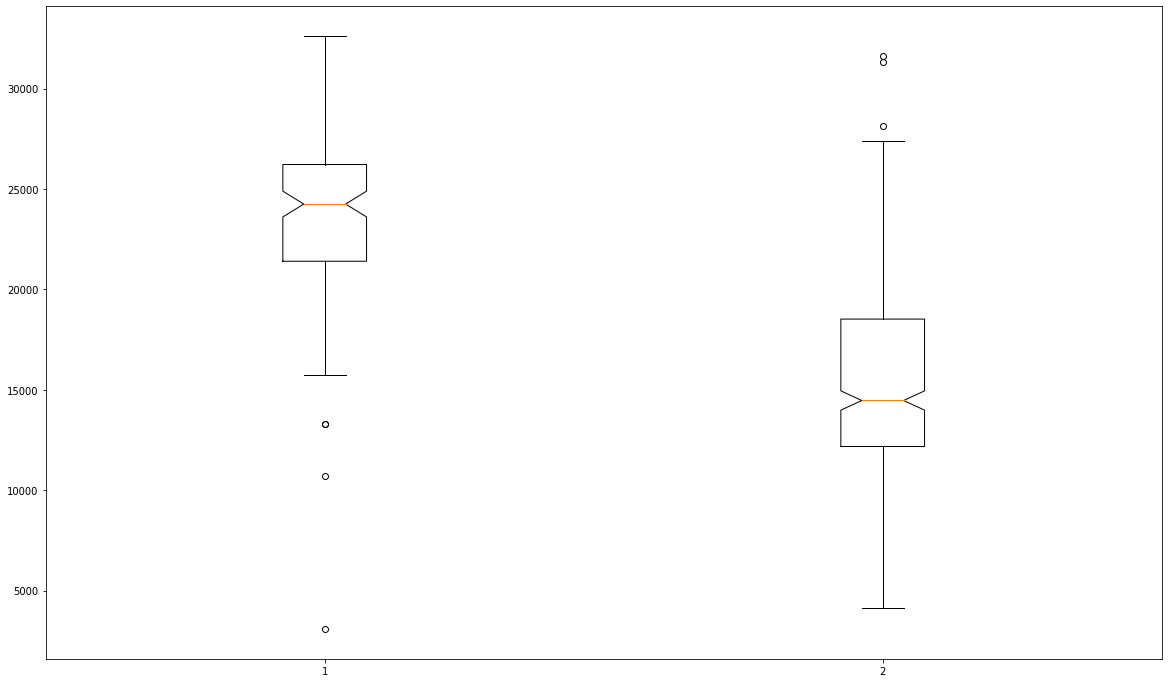

In [279]:
fig, ax = plt.subplots(figsize=(20,12))

plt.boxplot(handy_data,  1)
plt.show()

In [281]:
the_rural_frame.corr()

pub  place_of_worship    school      cafe  \
pub                 1.000000          0.517666  0.552524  0.589861   
place_of_worship    0.517666          1.000000  0.455774  0.429866   
school              0.552524          0.455774  1.000000  0.358106   
cafe                0.589861          0.429866  0.358106  1.000000   
community_centre    0.315748          0.325410  0.265880  0.273279   
doctors             0.377381          0.339700  0.392582  0.320539   
population          0.632413          0.542825  0.681046  0.429671   
population_grouped  0.635441          0.533902  0.677752  0.432024   
pubs_per_person     0.344024         -0.026948 -0.092881  0.059584   
useful_imd          0.112329          0.015978  0.132317  0.047461   

                    community_centre   doctors  population  \
pub                         0.315748  0.377381    0.632413   
place_of_worship            0.325410  0.339700    0.542825   
school                      0.265880  0.392582    0.681046   
cafe                        0.273279  0.320539    0.429671   
community_centre            1.000000  0.237570    0.341143   
doctors                     0.237570  1.000000    0.539642   
population                  0.341143  0.539642    1.000000   
population_grouped          0.331420  0.528747    0.985569   
pubs_per_person            -0.000430 -0.066828   -0.175220   
useful_imd                  0.049284  0.104096    0.156549   

                    population_grouped  pubs_per_person  useful_imd  
pub                           0.635441         0.344024    0.112329  
place_of_worship              0.533902        -0.026948    0.015978  
school                        0.677752        -0.092881    0.132317  
cafe                          0.432024         0.059584    0.047461  
community_centre              0.331420        -0.000430    0.049284  
doctors                       0.528747        -0.066828    0.104096  
population                    0.985569        -0.175220    0.156549  
population_grouped            1.000000        -0.173725    0.156052  
pubs_per_person              -0.173725         1.000000   -0.016385  
useful_imd                    0.156052        -0.016385    1.000000

In [283]:
the_rural_frame.loc[:, 'schools_per_person'] = the_rural_frame.school / the_rural_frame.population
the_rural_frame.loc[:, 'cafe_per_person'] = the_rural_frame.cafe / the_rural_frame.population
the_rural_frame.loc[:, 'doctors_per_person'] = the_rural_frame.doctors / the_rural_frame.population
the_rural_frame.loc[:, 'worship_per_person'] = the_rural_frame.place_of_worship / the_rural_frame.population

the_rural_frame.corr()

pub  place_of_worship    school      cafe  \
pub                 1.000000          0.517666  0.552524  0.589861   
place_of_worship    0.517666          1.000000  0.455774  0.429866   
school              0.552524          0.455774  1.000000  0.358106   
cafe                0.589861          0.429866  0.358106  1.000000   
community_centre    0.315748          0.325410  0.265880  0.273279   
doctors             0.377381          0.339700  0.392582  0.320539   
population          0.632413          0.542825  0.681046  0.429671   
population_grouped  0.635441          0.533902  0.677752  0.432024   
pubs_per_person     0.344024         -0.026948 -0.092881  0.059584   
useful_imd          0.112329          0.015978  0.132317  0.047461   
schools_per_person  0.049552          0.024827  0.481683  0.026283   
cafe_per_person     0.089596          0.064613 -0.015012  0.467258   
doctors_per_person  0.167393          0.120877  0.165952  0.143378   
worship_per_person -0.285784          0.198414 -0.354432 -0.105129   

                    community_centre   doctors  population  \
pub                         0.315748  0.377381    0.632413   
place_of_worship            0.325410  0.339700    0.542825   
school                      0.265880  0.392582    0.681046   
cafe                        0.273279  0.320539    0.429671   
community_centre            1.000000  0.237570    0.341143   
doctors                     0.237570  1.000000    0.539642   
population                  0.341143  0.539642    1.000000   
population_grouped          0.331420  0.528747    0.985569   
pubs_per_person            -0.000430 -0.066828   -0.175220   
useful_imd                  0.049284  0.104096    0.156549   
schools_per_person          0.010595 -0.007716   -0.029332   
cafe_per_person             0.047395  0.015389   -0.057870   
doctors_per_person          0.097666  0.681297    0.165186   
worship_per_person         -0.136253 -0.186479   -0.403156   

                    population_grouped  pubs_per_person  useful_imd  \
pub                           0.635441         0.344024    0.112329   
place_of_worship              0.533902        -0.026948    0.015978   
school                        0.677752        -0.092881    0.132317   
cafe                          0.432024         0.059584    0.047461   
community_centre              0.331420        -0.000430    0.049284   
doctors                       0.528747        -0.066828    0.104096   
population                    0.985569        -0.175220    0.156549   
population_grouped            1.000000        -0.173725    0.156052   
pubs_per_person              -0.173725         1.000000   -0.016385   
useful_imd                    0.156052        -0.016385    1.000000   
schools_per_person           -0.027506         0.066745    0.025061   
cafe_per_person              -0.057677         0.203048   -0.023707   
doctors_per_person            0.164476         0.009406    0.049591   
worship_per_person           -0.404107         0.141177   -0.173611   

                    schools_per_person  cafe_per_person  doctors_per_person  \
pub                           0.049552         0.089596            0.167393   
place_of_worship              0.024827         0.064613            0.120877   
school                        0.481683        -0.015012            0.165952   
cafe                          0.026283         0.467258            0.143378   
community_centre              0.010595         0.047395            0.097666   
doctors                      -0.007716         0.015389            0.681297   
population                   -0.029332        -0.057870            0.165186   
population_grouped           -0.027506        -0.057677            0.164476   
pubs_per_person               0.066745         0.203048            0.009406   
useful_imd                    0.025061        -0.023707            0.049591   
schools_per_person            1.000000         0.068875            0.041300   
cafe_per_person              

### Get population density of parishes

In [285]:
import geopandas as gdp
geo = gdp.read_file("OA_2021_EW_BFE_V7.shp")
other_df = geo.to_crs("epsg:4326")

In [286]:
other_df.head()

OBJECTID     OA21CD   SHAPE_Leng    SHAPE_Area  \
0         1  E00000001   448.104925   6707.003330   
1         2  E00000003   341.814871   4186.970730   
2         3  E00000005   444.386357   8736.115664   
3         4  E00000007  1607.023365  73494.157884   
4         5  E00000010   259.046872   2533.057603   

                                            geometry  
0  POLYGON ((-0.09446 51.52033, -0.09449 51.52024...  
1  POLYGON ((-0.09597 51.52023, -0.09606 51.52021...  
2  POLYGON ((-0.09629 51.51934, -0.09627 51.51933...  
3  POLYGON ((-0.09660 51.51851, -0.09640 51.51846...  
4  POLYGON ((-0.09689 51.52267, -0.09720 51.52260...

In [288]:
oa_df = pd.read_csv('joined_population_data.csv')
to_keep = oa_df[[
    'Area',
    'code',
    '2021',
    'lad22nm',
    'CTY21NM',
    'RGN21NM'
]].drop_duplicates()
to_keep.columns = ['Area', 'Code', 'Population', 'LADNM', 'CTYNM', 'RGNNM']
to_keep.head()

Area       Code  Population           LADNM         CTYNM  \
0  oa2021:E00000001  E00000001         176  City of London  Inner London   
1  oa2021:E00000003  E00000003         256  City of London  Inner London   
2  oa2021:E00000005  E00000005         112  City of London  Inner London   
3  oa2021:E00000007  E00000007         144  City of London  Inner London   
4  oa2021:E00000010  E00000010         178  City of London  Inner London   

    RGNNM  
0  London  
1  London  
2  London  
3  London  
4  London

In [289]:
good_merge = to_keep.merge(other_df, how='inner', left_on='Code', right_on='OA21CD')
good_merge.loc[:, 'population_density'] = good_merge.Population / good_merge.SHAPE_Area
good_merge.head()

Area       Code  Population           LADNM         CTYNM  \
0  oa2021:E00000001  E00000001         176  City of London  Inner London   
1  oa2021:E00000003  E00000003         256  City of London  Inner London   
2  oa2021:E00000005  E00000005         112  City of London  Inner London   
3  oa2021:E00000007  E00000007         144  City of London  Inner London   
4  oa2021:E00000010  E00000010         178  City of London  Inner London   

    RGNNM  OBJECTID     OA21CD   SHAPE_Leng    SHAPE_Area  \
0  London         1  E00000001   448.104925   6707.003330   
1  London         2  E00000003   341.814871   4186.970730   
2  London         3  E00000005   444.386357   8736.115664   
3  London         4  E00000007  1607.023365  73494.157884   
4  London         5  E00000010   259.046872   2533.057603   

                                            geometry  population_density  
0  POLYGON ((-0.09446 51.52033, -0.09449 51.52024...            0.026241  
1  POLYGON ((-0.09597 51.52023, -0.09606 51.52021...            0.061142  
2  POLYGON ((-0.09629 51.51934, -0.09627 51.51933...            0.012820  
3  POLYGON ((-0.09660 51.51851, -0.09640 51.51846...            0.001959  
4  POLYGON ((-0.09689 51.52267, -0.09720 51.52260...            0.070271

In [290]:
maybe = pd.read_csv('Parishes_(December_2022)_EW_BFC.csv')
maybe.head()

OBJECTID    PAR22CD       PAR22NM PAR22NW   BNG_E   BNG_N     LONG  \
0         1  E04000001      Blackrod          361040  410661 -2.59006   
1         2  E04000002       Horwich          365741  411963 -2.51919   
2         3  E04000003  Westhoughton          365008  406179 -2.52961   
3         4  E04000004       Ringway          381192  384606 -2.28405   
4         5  E04000005   Saddleworth          400672  407034 -1.99132   

         LAT                                GlobalID  SHAPE_Length  \
0  53.591080  {D6215C24-E06A-4C75-A09C-97365AEF3B1A}  17261.857493   
1  53.603111  {2BEA80C5-0126-49F2-BC33-78DB273B1661}  22234.911763   
2  53.551079  {2A496214-78EA-4153-8BBD-9B30490174FE}  23327.862894   
3  53.358009  {10BBEB68-DF2B-409A-A15C-3B02958D0C32}  14425.838285   
4  53.559940  {3243E27D-130D-4F55-8064-07BAADC7BC30}  44464.699193   

     SHAPE_Area  
0  8.605171e+06  
1  1.423806e+07  
2  1.786362e+07  
3  6.548172e+06  
4  7.611406e+07

In [292]:
with_area = the_rural_frame.merge(maybe[['PAR22NM', 'SHAPE_Area']], how='left', left_on='name', right_on='PAR22NM')
with_area.head()

name          county              PAR22NM_x  pub  \
0            Ab Kettleby  Leicestershire            Ab Kettleby  1.0   
1  Abbas and Templecombe        Somerset  Abbas and Templecombe  0.0   
2               Abberley  Worcestershire               Abberley  1.0   
3               Abberton           Essex               Abberton  0.0   
4               Abberton           Essex               Abberton  0.0   

   place_of_worship  school  cafe  community_centre  doctors  population  \
0               3.0     1.0   1.0               0.0      0.0       534.0   
1               2.0     1.0   1.0               0.0      0.0      1657.0   
2               3.0     1.0   0.0               1.0      0.0       786.0   
3               1.0     1.0   0.0               0.0      0.0       446.0   
4               1.0     1.0   0.0               0.0      0.0       446.0   

   population_grouped  pubs_per_person  useful_imd  schools_per_person  \
0               500.0         0.001873     20254.0            0.001873   
1              1700.0         0.000000     16546.0            0.000604   
2               800.0         0.001272     25631.0            0.001272   
3               400.0         0.000000     21391.0            0.002242   
4               400.0         0.000000     21391.0            0.002242   

   cafe_per_person  doctors_per_person  worship_per_person  \
0         0.001873                 0.0            0.005618   
1         0.000604                 0.0            0.001207   
2         0.000000                 0.0            0.003817   
3         0.000000                 0.0            0.002242   
4         0.000000                 0.0            0.002242   

               PAR22NM_y    SHAPE_Area  
0            Ab Kettleby  1.266833e+07  
1  Abbas and Templecombe  7.721619e+06  
2               Abberley  9.751655e+06  
3               Abberton  4.329655e+06  
4               Abberton  4.037587e+06

In [293]:
with_area.loc[:, 'pop_density'] = with_area.population / with_area.SHAPE_Area
with_area.head()

name          county              PAR22NM_x  pub  \
0            Ab Kettleby  Leicestershire            Ab Kettleby  1.0   
1  Abbas and Templecombe        Somerset  Abbas and Templecombe  0.0   
2               Abberley  Worcestershire               Abberley  1.0   
3               Abberton           Essex               Abberton  0.0   
4               Abberton           Essex               Abberton  0.0   

   place_of_worship  school  cafe  community_centre  doctors  population  \
0               3.0     1.0   1.0               0.0      0.0       534.0   
1               2.0     1.0   1.0               0.0      0.0      1657.0   
2               3.0     1.0   0.0               1.0      0.0       786.0   
3               1.0     1.0   0.0               0.0      0.0       446.0   
4               1.0     1.0   0.0               0.0      0.0       446.0   

   population_grouped  pubs_per_person  useful_imd  schools_per_person  \
0               500.0         0.001873     20254.0            0.001873   
1              1700.0         0.000000     16546.0            0.000604   
2               800.0         0.001272     25631.0            0.001272   
3               400.0         0.000000     21391.0            0.002242   
4               400.0         0.000000     21391.0            0.002242   

   cafe_per_person  doctors_per_person  worship_per_person  \
0         0.001873                 0.0            0.005618   
1         0.000604                 0.0            0.001207   
2         0.000000                 0.0            0.003817   
3         0.000000                 0.0            0.002242   
4         0.000000                 0.0            0.002242   

               PAR22NM_y    SHAPE_Area  pop_density  
0            Ab Kettleby  1.266833e+07     0.000042  
1  Abbas and Templecombe  7.721619e+06     0.000215  
2               Abberley  9.751655e+06     0.000081  
3               Abberton  4.329655e+06     0.000103  
4               Abberton  4.037587e+06     0.000110

In [294]:
with_area.corr()

pub  place_of_worship    school      cafe  \
pub                 1.000000          0.498398  0.544115  0.569950   
place_of_worship    0.498398          1.000000  0.436206  0.412283   
school              0.544115          0.436206  1.000000  0.346874   
cafe                0.569950          0.412283  0.346874  1.000000   
community_centre    0.306646          0.322189  0.260134  0.260678   
doctors             0.362143          0.322929  0.383690  0.310946   
population          0.614852          0.514322  0.668132  0.418676   
population_grouped  0.618735          0.507804  0.666714  0.420681   
pubs_per_person     0.364005         -0.022813 -0.083746  0.063151   
useful_imd          0.100979          0.010551  0.121713  0.038268   
schools_per_person  0.067676          0.034003  0.506626  0.029207   
cafe_per_person     0.096211          0.075507 -0.014431  0.486336   
doctors_per_person  0.163349          0.117190  0.165235  0.137886   
worship_per_person -0.286911          0.217039 -0.354760 -0.101054   
SHAPE_Area          0.276455          0.281127  0.227876  0.216088   
pop_density         0.306501          0.205265  0.336613  0.263773   

                    community_centre   doctors  population  \
pub                         0.306646  0.362143    0.614852   
place_of_worship            0.322189  0.322929    0.514322   
school                      0.260134  0.383690    0.668132   
cafe                        0.260678  0.310946    0.418676   
community_centre            1.000000  0.223260    0.326391   
doctors                     0.223260  1.000000    0.546388   
population                  0.326391  0.546388    1.000000   
population_grouped          0.318155  0.535172    0.986885   
pubs_per_person             0.004253 -0.069722   -0.175376   
useful_imd                  0.042151  0.095319    0.134509   
schools_per_person          0.007935 -0.007087   -0.020977   
cafe_per_person             0.045645  0.012118   -0.056767   
doctors_per_person          0.094214  0.679781    0.172231   
worship_per_person         -0.129494 -0.183695   -0.405522   
SHAPE_Area                  0.199808  0.124703    0.195168   
pop_density                 0.142988  0.314561    0.582451   

                    population_grouped  pubs_per_person  useful_imd  \
pub                           0.618735         0.364005    0.100979   
place_of_worship              0.507804        -0.022813    0.010551   
school                        0.666714        -0.083746    0.121713   
cafe                          0.420681         0.063151    0.038268   
community_centre              0.318155         0.004253    0.042151   
doctors                       0.535172        -0.069722    0.095319   
population                    0.986885        -0.175376    0.134509   
population_grouped            1.000000        -0.174182    0.135133   
pubs_per_person              -0.174182         1.000000   -0.011328   
useful_imd                    0.135133        -0.011328    1.000000   
schools_per_person           -0.019144         0.074034    0.025485   
cafe_per_person              -0.057077         0.202695   -0.027799   
doctors_per_person            0.171680         0.001283    0.048216   
worship_per_person           -0.407407         0.129372   -0.155436   
SHAPE_Area                    0.196316         0.078171   -0.110096   
pop_density                   0.571139        -0.129045    0.121910   

                    schools_per_person  cafe_per_person  doctors_per_person  \
pub                           0.067676         0.096211            0.163349   
place_of_worship              0.034003         0.075507            0.117190   
school                        0.506626        -0.014431            0.165235   
cafe                          0.029207         0.486336            0.137886   
community_centre              0.007935         0.045645            0.094214   
doctors                      -0.007087         0.012118            0.679781   
population        

In [295]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [470]:
to_keep = ['pub', 'school', 'place_of_worship', 'cafe', 'community_centre', 'doctors', 'population', 'useful_imd', 'SHAPE_Area', 'county']
predictor_frame = with_area[with_area.population <= 2000][(to_keep)]
predictor_frame.head()

pub  school  place_of_worship  cafe  community_centre  doctors  population  \
0  1.0     1.0               3.0   1.0               0.0      0.0       534.0   
1  0.0     1.0               2.0   1.0               0.0      0.0      1657.0   
2  1.0     1.0               3.0   0.0               1.0      0.0       786.0   
3  0.0     1.0               1.0   0.0               0.0      0.0       446.0   
4  0.0     1.0               1.0   0.0               0.0      0.0       446.0   

   useful_imd    SHAPE_Area          county  
0     20254.0  1.266833e+07  Leicestershire  
1     16546.0  7.721619e+06        Somerset  
2     25631.0  9.751655e+06  Worcestershire  
3     21391.0  4.329655e+06           Essex  
4     21391.0  4.037587e+06           Essex

In [471]:
form_1 = 'pub ~ population + useful_imd + SHAPE_Area'
fit_1 = smf.ols(formula=form_1, data=predictor_frame).fit()
fit_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pub   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     711.6
Date:                Fri, 06 Jan 2023   Prob (F-statistic):               0.00
Time:                        16:08:53   Log-Likelihood:                -7303.9
No. Observations:                5730   AIC:                         1.462e+04
Df Residuals:                    5726   BIC:                         1.464e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0027      0.050      0.055      0.956      -0.095       0.100
population     0.0011   2.67e-05     40.520      0.000       0.001       0.001
useful_imd  9.286e-06   2.32e-06      3.995      0.000    4.73e-06    1.38e-05
SHAPE_Area  1.685e-08   1.31e-09     12.909      0.000    1.43e-08    1.94e-08
==============================================================================
Omnibus:                     1243.540   Durbin-Watson:                   1.578
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4230.989
Skew:                           1.076   Prob(JB):                         0.00
Kurtosis:                       6.618   Cond. No.                     6.17e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.17e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

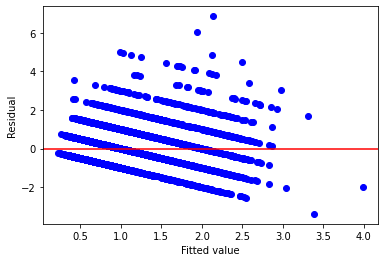

In [472]:
def make_fittedvalues_resid_plot(fit):
    plt.figure()
    plt.scatter(fit.fittedvalues, fit.resid, color='b')
    plt.axhline(y=0, color='r')
    plt.xlabel("Fitted value")
    plt.ylabel("Residual")
    return

make_fittedvalues_resid_plot(fit_1)
plt.show()

<Figure size 432x288 with 0 Axes>

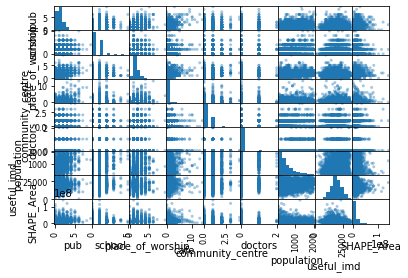

In [473]:
plt.figure()
pd.plotting.scatter_matrix(
    predictor_frame,
    alpha=0.4
)
plt.show()

In [474]:
predictor_frame['ln_area'] = np.log(predictor_frame.SHAPE_Area)
predictor_frame['ln_population'] = np.log(predictor_frame.population)

form_2 = 'pub ~ ln_population + useful_imd + ln_area'
fit_2 = smf.ols(formula=form_2, data=predictor_frame).fit()
fit_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pub   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     718.0
Date:                Fri, 06 Jan 2023   Prob (F-statistic):               0.00
Time:                        16:09:10   Log-Likelihood:                -7296.9
No. Observations:                5730   AIC:                         1.460e+04
Df Residuals:                    5726   BIC:                         1.463e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -6.1782      0.302    -20.427      0.000      -6.771      -5.585
ln_population     0.6554      0.016     40.487      0.000       0.624       0.687
useful_imd     1.005e-05   2.33e-06      4.313      0.000    5.48e-06    1.46e-05
ln_area           0.1865      0.019      9.866      0.000       0.149       0.224
==============================================================================
Omnibus:                     1376.980   Durbin-Watson:                   1.583
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4892.610
Skew:                           1.177   Prob(JB):                         0.00
Kurtosis:                       6.867   Cond. No.                     5.27e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.27e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

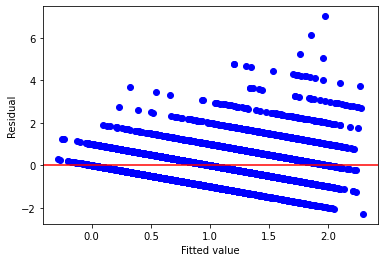

In [475]:
make_fittedvalues_resid_plot(fit_2)
plt.show()

In [476]:
multi_logistic = smf.mnlogit(formula=form_2, data=predictor_frame).fit()
multi_logistic.summary()

Optimization terminated successfully.
         Current function value: 1.112601
         Iterations 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                    pub   No. Observations:                 5730
Model:                        MNLogit   Df Residuals:                     5694
Method:                           MLE   Df Model:                           27
Date:                Fri, 06 Jan 2023   Pseudo R-squ.:                  0.1344
Time:                        16:09:22   Log-Likelihood:                -6375.2
converged:                       True   LL-Null:                       -7364.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================
        pub=1       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -9.6124      0.889    -10.807      0.000     -11.356      -7.869
ln_population     1.0549      0.053     20.048      0.000       0.952       1.158
useful_imd     2.817e-05   6.55e-06      4.298      0.000    1.53e-05     4.1e-05
ln_area           0.1925      0.054      3.585      0.000       0.087       0.298
---------------------------------------------------------------------------------
        pub=2       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -22.5232      1.295    -17.395      0.000     -25.061     -19.985
ln_population     2.0953      0.076     27.607      0.000       1.947       2.244
useful_imd     4.398e-05   9.37e-06      4.696      0.000    2.56e-05    6.23e-05
ln_area           0.5007      0.076      6.627      0.000       0.353       0.649
---------------------------------------------------------------------------------
        pub=3       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -30.7978      1.972    -15.616      0.000     -34.663     -26.932
ln_population     2.8778      0.125     22.992      0.000       2.632       3.123
useful_imd     3.926e-05   1.37e-05      2.866      0.004    1.24e-05    6.61e-05
ln_area           0.6271      0.111      5.640      0.000       0.409       0.845
---------------------------------------------------------------------------------
        pub=4       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -39.1839      3.348    -11.703      0.000     -45.746     -32.622
ln_population     3.1269      0.222     14.069      0.000       2.691       3.563
useful_imd     1.709e-05   2.23e-05      0.765      0.444   -2.67e-05    6.08e-05
ln_area           0.9890      0.184      5.380      0.000       0.629       1.349
---------------------------------------------------------------------------------
        pub=5       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -76.0772      7.404    -10.276      0.000     -90.588     -61.566
ln_population     4.2769      0.552      7.744      0.000       3.194       5.359
useful_imd        0.0001   4.21e-05      2.434      0.015       2e-05       0.000
ln_area           2.5368      0.350      7.252      0.000       1.851       3.222
---------------------------------------------------------------------------------
        pub=6       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -52.3685      7.909     -6.621      0.000     -67.870     -36.867
ln_population     3.4581      0.552      6.

In [477]:
predictor_frame.loc[:, 'pub_bool'] = predictor_frame.pub > 0
predictor_frame.loc[:, 'pop_density'] = predictor_frame.population / predictor_frame.SHAPE_Area
predictor_frame.loc[:, 'ln_pop_density'] = np.log(predictor_frame.pop_density)
predictor_frame.pub_bool = predictor_frame.pub_bool.astype(int)
predictor_frame.head()


pub  school  place_of_worship  cafe  community_centre  doctors  population  \
0  1.0     1.0               3.0   1.0               0.0      0.0       534.0   
1  0.0     1.0               2.0   1.0               0.0      0.0      1657.0   
2  1.0     1.0               3.0   0.0               1.0      0.0       786.0   
3  0.0     1.0               1.0   0.0               0.0      0.0       446.0   
4  0.0     1.0               1.0   0.0               0.0      0.0       446.0   

   useful_imd    SHAPE_Area          county    ln_area  ln_population  \
0     20254.0  1.266833e+07  Leicestershire  16.354616       6.280396   
1     16546.0  7.721619e+06        Somerset  15.859535       7.412764   
2     25631.0  9.751655e+06  Worcestershire  16.092948       6.666957   
3     21391.0  4.329655e+06           Essex  15.280998       6.100319   
4     21391.0  4.037587e+06           Essex  15.211158       6.100319   

   pub_bool  pop_density  ln_pop_density  
0         1     0.000042      -10.074220  
1         0     0.000215       -8.446771  
2         1     0.000081       -9.425991  
3         0     0.000103       -9.180679  
4         0     0.000110       -9.110839

In [478]:
log_reg = smf.logit("pub_bool ~ useful_imd + ln_population * ln_area", data=predictor_frame).fit_regularized()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5447650630868432
            Iterations: 18
            Function evaluations: 29
            Gradient evaluations: 18


/opt/homebrew/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/homebrew/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


In [479]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               pub_bool   No. Observations:                 5730
Model:                          Logit   Df Residuals:                     5725
Method:                           MLE   Df Model:                            4
Date:                Fri, 06 Jan 2023   Pseudo R-squ.:                  0.1568
Time:                        16:09:40   Log-Likelihood:                -3121.5
converged:                       True   LL-Null:                       -3702.1
Covariance Type:            nonrobust   LLR p-value:                4.240e-250
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.1591      7.099     -0.022      0.982     -14.072      13.754
useful_imd             3.177e-05   6.32e-06      5.024      0.000    1.94e-05    4.42e-05
ln_population            -0.7357      1.197     -0.615      0.539      -3.082       1.611
ln_area                  -0.5035      0.446     -1.129      0.259      -1.377       0.370
ln_population:ln_area     0.1321      0.075      1.758      0.079      -0.015       0.279
=========================================================================================
"""

/var/folders/zs/1hvc18dn7v94z77k1xy7g90c0000gn/T/ipykernel_34646/3049280191.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  pd.plotting.scatter_matrix(


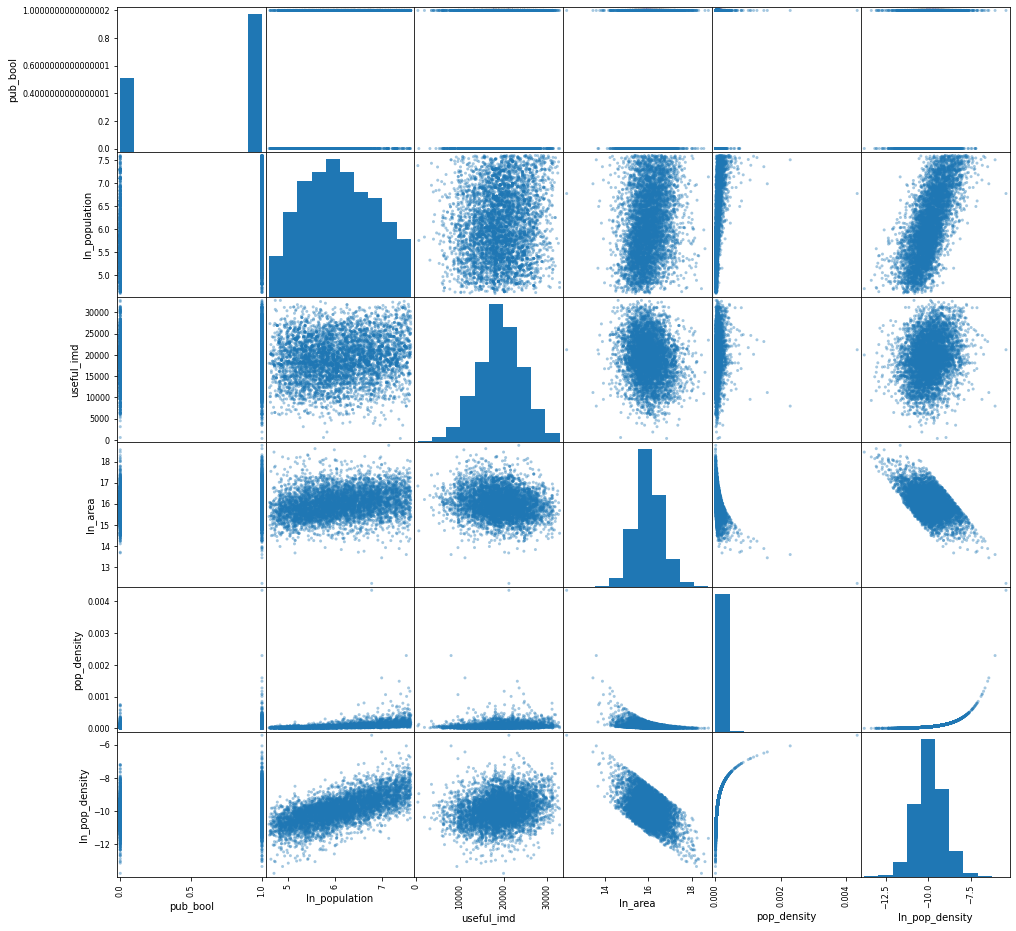

In [480]:
fig, ax = plt.subplots(figsize=(16,16))
pd.plotting.scatter_matrix(
    predictor_frame[['pub_bool', 'ln_population', 'useful_imd', 'ln_area', 'pop_density', 'ln_pop_density']],
    alpha=0.4, ax=ax
)
plt.show()

In [481]:
predictor_frame.head()

pub  school  place_of_worship  cafe  community_centre  doctors  population  \
0  1.0     1.0               3.0   1.0               0.0      0.0       534.0   
1  0.0     1.0               2.0   1.0               0.0      0.0      1657.0   
2  1.0     1.0               3.0   0.0               1.0      0.0       786.0   
3  0.0     1.0               1.0   0.0               0.0      0.0       446.0   
4  0.0     1.0               1.0   0.0               0.0      0.0       446.0   

   useful_imd    SHAPE_Area          county    ln_area  ln_population  \
0     20254.0  1.266833e+07  Leicestershire  16.354616       6.280396   
1     16546.0  7.721619e+06        Somerset  15.859535       7.412764   
2     25631.0  9.751655e+06  Worcestershire  16.092948       6.666957   
3     21391.0  4.329655e+06           Essex  15.280998       6.100319   
4     21391.0  4.037587e+06           Essex  15.211158       6.100319   

   pub_bool  pop_density  ln_pop_density  
0         1     0.000042      -10.074220  
1         0     0.000215       -8.446771  
2         1     0.000081       -9.425991  
3         0     0.000103       -9.180679  
4         0     0.000110       -9.110839

In [482]:
hah = pd.concat([predictor_frame,pd.get_dummies(predictor_frame.county)], axis=1)


In [485]:
log_reg = smf.logit("pub_bool ~ useful_imd + Oxfordshire + Devon + Cumbria + Nottinghamshire + Surrey + Essex + Leicestershire + Somerset + Derbyshire + Norfolk + Suffolk + ln_population + ln_area", data=hah).fit_regularized()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.53479535539733
            Iterations: 98
            Function evaluations: 107
            Gradient evaluations: 98


/opt/homebrew/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/homebrew/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


In [486]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:               pub_bool   No. Observations:                 5730
Model:                          Logit   Df Residuals:                     5715
Method:                           MLE   Df Model:                           14
Date:                Fri, 06 Jan 2023   Pseudo R-squ.:                  0.1723
Time:                        16:10:40   Log-Likelihood:                -3064.4
converged:                       True   LL-Null:                       -3702.1
Covariance Type:            nonrobust   LLR p-value:                1.065e-263
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -11.9664      0.886    -13.505      0.000     -13.703     -10.230
useful_imd        1.29e-05   6.81e-06      1.894      0.058    -4.5e-07    2.62e-05
Oxfordshire         0.6072      

## Handy

In [487]:
predictor_frame.head()

pub  school  place_of_worship  cafe  community_centre  doctors  population  \
0  1.0     1.0               3.0   1.0               0.0      0.0       534.0   
1  0.0     1.0               2.0   1.0               0.0      0.0      1657.0   
2  1.0     1.0               3.0   0.0               1.0      0.0       786.0   
3  0.0     1.0               1.0   0.0               0.0      0.0       446.0   
4  0.0     1.0               1.0   0.0               0.0      0.0       446.0   

   useful_imd    SHAPE_Area          county    ln_area  ln_population  \
0     20254.0  1.266833e+07  Leicestershire  16.354616       6.280396   
1     16546.0  7.721619e+06        Somerset  15.859535       7.412764   
2     25631.0  9.751655e+06  Worcestershire  16.092948       6.666957   
3     21391.0  4.329655e+06           Essex  15.280998       6.100319   
4     21391.0  4.037587e+06           Essex  15.211158       6.100319   

   pub_bool  pop_density  ln_pop_density  
0         1     0.000042      -10.074220  
1         0     0.000215       -8.446771  
2         1     0.000081       -9.425991  
3         0     0.000103       -9.180679  
4         0     0.000110       -9.110839

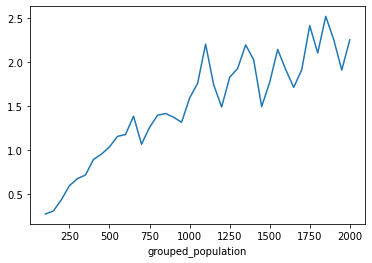

In [488]:
predictor_frame.loc[:, 'grouped_population'] = predictor_frame.population.apply(lambda x: 50*np.round(x/50))
predictor_frame.groupby(['grouped_population']).agg('mean').pub.plot()
plt.show()

In [489]:
imd_ols = smf.ols("useful_imd ~ ln_population * ln_area + pub + school + place_of_worship", data=predictor_frame).fit()
print(imd_ols.summary())

                            OLS Regression Results                            
Dep. Variable:             useful_imd   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     63.09
Date:                Fri, 06 Jan 2023   Prob (F-statistic):           4.01e-76
Time:                        16:10:56   Log-Likelihood:                -56792.
No. Observations:                5730   AIC:                         1.136e+05
Df Residuals:                    5723   BIC:                         1.136e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              4.264e+

/var/folders/zs/1hvc18dn7v94z77k1xy7g90c0000gn/T/ipykernel_34646/3359280506.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  pd.plotting.scatter_matrix(


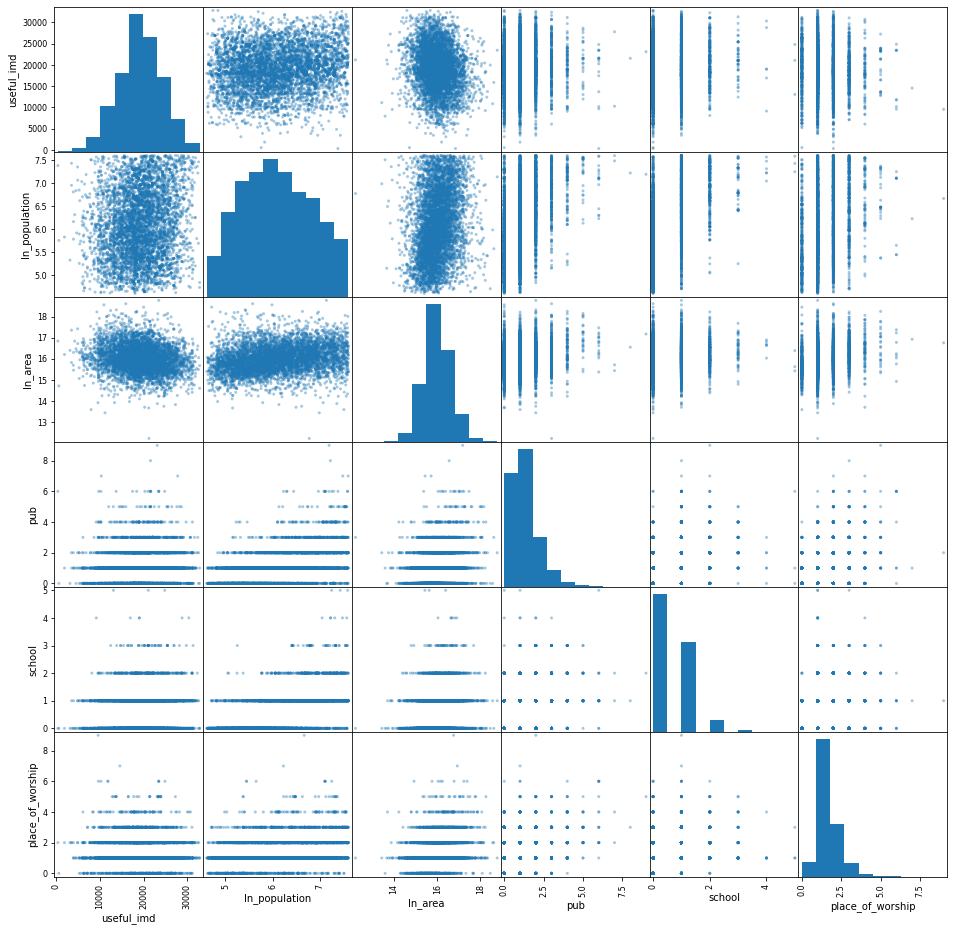

In [490]:
fig, ax = plt.subplots(figsize=(16,16))
pd.plotting.scatter_matrix(
    predictor_frame[['useful_imd', 'ln_population', 'ln_area', 'pub', 'school', 'place_of_worship']],
    alpha=0.4, ax=ax
)
plt.show()

In [492]:
overall_dict.keys()

dict_keys(['North Yorkshire', 'Warwickshire', 'Surrey', 'Lancashire', 'Leicestershire', 'Merseyside', 'West Yorkshire', 'Somerset', 'Worcestershire', 'Essex', 'Norfolk', 'Hampshire', 'East Sussex', 'Nottinghamshire', 'Suffolk', 'West Midlands', 'South Yorkshire', 'Lincolnshire', 'Kent', 'Cumbria', 'West Sussex', 'Cambridgeshire', 'Staffordshire', 'Devon', 'Derbyshire', 'Hertfordshire', 'Greater Manchester', 'Gloucestershire', 'Tyne and Wear', 'Oxfordshire'])

In [494]:
only_rural_dict.keys()

dict_keys(['North Yorkshire', 'Warwickshire', 'Surrey', 'Lancashire', 'Leicestershire', 'Merseyside', 'West Yorkshire', 'Somerset', 'Worcestershire', 'Essex', 'Norfolk', 'Hampshire', 'East Sussex', 'Nottinghamshire', 'Suffolk', 'West Midlands', 'South Yorkshire', 'Lincolnshire', 'Kent', 'Cumbria', 'West Sussex', 'Cambridgeshire', 'Staffordshire', 'Devon', 'Derbyshire', 'Hertfordshire', 'Greater Manchester', 'Gloucestershire', 'Tyne and Wear', 'Oxfordshire'])

In [515]:
loss_dict = {}
for key, value in overall_dict.items():
    all_parishes = len(value)
    overall_population = np.sum([a['population'] for a in value.values()])
    overall_oa = np.sum([len(b['classification']) for b in value.values()])
    rural_only = only_rural_dict[key]
    rural_population = np.sum([c['population'] for c in rural_only.values()])
    rural_oa = np.sum([len(d['classification']) for d in rural_only.values()])
    rural_parishes = len(rural_only)
    loss_dict[key] = {
        'overall_population': overall_population,
        'overall_oa': overall_oa,
        'overall_parishes': all_parishes,
        'rural_population': rural_population,
        'rural_oa': rural_oa,
        'rural_parishes': rural_parishes
    }
    

In [519]:
loss_df = pd.DataFrame(loss_dict).T
loss_df.sort_values(by='overall_population')

overall_population  overall_oa  overall_parishes  \
Cumbria                         499865        1744               257   
East Sussex                     545857        1818               100   
Somerset                        571526        1892               310   
Warwickshire                    596780        1925               188   
Worcestershire                  603662        1953               181   
North Yorkshire                 615514        2106               527   
Gloucestershire                 645093        2114               247   
Cambridgeshire                  678847        2085               224   
Leicestershire                  712367        2227               201   
Oxfordshire                     725275        2201               286   
Suffolk                         760652        2527               423   
Lincolnshire                    768385        2460               426   
Derbyshire                      794618        2648               231   
Devon                           811609        2614               393   
Nottinghamshire                 824822        2720               203   
Staffordshire                   876120        2856               193   
West Sussex                     882689        2819               151   
Norfolk                         916087        3055               491   
Tyne and Wear                  1127186        3893                14   
Hertfordshire                  1198783        3663               134   
Surrey                         1203079        3662                95   
Lancashire                     1235395        4024               209   
South Yorkshire                1374974        4514                97   
Hampshire                      1400961        4493               261   
Merseyside                     1423339        4768                27   
Essex                          1503463        4792               302   
Kent                           1576042        4881               317   
West Yorkshire                 2351646        7345                97   
Greater Manchester             2867794        8966                23   
West Midlands                  2919701        8735                28   

                    rural_population  rural_oa  rural_parishes  
Cumbria                       225694       781             237  
East Sussex                   109130       352              73  
Somerset                      209826       705             268  
Warwickshire                  117423       394             151  
Worcestershire                120361       384             142  
North Yorkshire               271190       958             482  
Gloucestershire               117672       386             183  
Cambridgeshire                211708       658             175  
Leicestershire                123516       386             139  
Oxfordshire                   155536       492             222  
Suffolk                       249664       848             372  
Lincolnshire                  273105       891             373  
Derbyshire                    120975       415             145  
Devon                         294377       957             347  
Nottinghamshire               130383       432             157  
Staffordshire                 135863       422             120  
West Sussex                   122350       394              93  
Norfolk                       339321      1151             430  
Tyne and Wear                   2474         8               2  
Hertfordshire                  76078       242              78  
Surrey                         79167       257              48  
Lancashire                    154868       493             124  
South Yorkshire                49993       173              51  
Hampshire                     200330       649             172  
Merseyside                      8307        30               3  
Essex                         259385       812             218  
Kent                          31

In [520]:
loss_df.loc[:, 'pct_population'] = 100*loss_df.rural_population / loss_df.overall_population
loss_df.loc[:, 'pct_oa'] = 100*loss_df.rural_oa / loss_df.overall_oa
loss_df.loc[:, 'pct_parishes'] = 100*loss_df.rural_parishes / loss_df.overall_parishes
loss_df

overall_population  overall_oa  overall_parishes  \
North Yorkshire                 615514        2106               527   
Warwickshire                    596780        1925               188   
Surrey                         1203079        3662                95   
Lancashire                     1235395        4024               209   
Leicestershire                  712367        2227               201   
Merseyside                     1423339        4768                27   
West Yorkshire                 2351646        7345                97   
Somerset                        571526        1892               310   
Worcestershire                  603662        1953               181   
Essex                          1503463        4792               302   
Norfolk                         916087        3055               491   
Hampshire                      1400961        4493               261   
East Sussex                     545857        1818               100   
Nottinghamshire                 824822        2720               203   
Suffolk                         760652        2527               423   
West Midlands                  2919701        8735                28   
South Yorkshire                1374974        4514                97   
Lincolnshire                    768385        2460               426   
Kent                           1576042        4881               317   
Cumbria                         499865        1744               257   
West Sussex                     882689        2819               151   
Cambridgeshire                  678847        2085               224   
Staffordshire                   876120        2856               193   
Devon                           811609        2614               393   
Derbyshire                      794618        2648               231   
Hertfordshire                  1198783        3663               134   
Greater Manchester             2867794        8966                23   
Gloucestershire                 645093        2114               247   
Tyne and Wear                  1127186        3893                14   
Oxfordshire                     725275        2201               286   

                    rural_population  rural_oa  rural_parishes  \
North Yorkshire               271190       958             482   
Warwickshire                  117423       394             151   
Surrey                         79167       257              48   
Lancashire                    154868       493             124   
Leicestershire                123516       386             139   
Merseyside                      8307        30               3   
West Yorkshire                 94305       302              44   
Somerset                      209826       705             268   
Worcestershire                120361       384             142   
Essex                         259385       812             218   
Norfolk                       339321      1151             430   
Hampshire                     200330       649             172   
East Sussex                   109130       352              73   
Nottinghamshire               130383       432             157   
Suffolk                       249664       848             372   
West Midlands                   9672        29               5   
South Yorkshire                49993       173              51   
Lincolnshire                  273105       891             373   
Kent                          312788       975             210   
Cumbria                       225694       781             237   
West Sussex                   122350       394              93   
Cambridgeshire                211708       658             175   
Staffordshire                 135863       422             120   
Devon                         294377       957             347   
Derbyshire                    120975       415             145   
Hertfordshire                  76078       242              78   
Great

In [521]:
loss_df.sort_values(by='pct_population', ascending=False)

overall_population  overall_oa  overall_parishes  \
Cumbria                         499865        1744               257   
North Yorkshire                 615514        2106               527   
Norfolk                         916087        3055               491   
Somerset                        571526        1892               310   
Devon                           811609        2614               393   
Lincolnshire                    768385        2460               426   
Suffolk                         760652        2527               423   
Cambridgeshire                  678847        2085               224   
Oxfordshire                     725275        2201               286   
East Sussex                     545857        1818               100   
Worcestershire                  603662        1953               181   
Kent                           1576042        4881               317   
Warwickshire                    596780        1925               188   
Gloucestershire                 645093        2114               247   
Leicestershire                  712367        2227               201   
Essex                          1503463        4792               302   
Nottinghamshire                 824822        2720               203   
Staffordshire                   876120        2856               193   
Derbyshire                      794618        2648               231   
Hampshire                      1400961        4493               261   
West Sussex                     882689        2819               151   
Lancashire                     1235395        4024               209   
Surrey                         1203079        3662                95   
Hertfordshire                  1198783        3663               134   
West Yorkshire                 2351646        7345                97   
South Yorkshire                1374974        4514                97   
Merseyside                     1423339        4768                27   
West Midlands                  2919701        8735                28   
Tyne and Wear                  1127186        3893                14   
Greater Manchester             2867794        8966                23   

                    rural_population  rural_oa  rural_parishes  \
Cumbria                       225694       781             237   
North Yorkshire               271190       958             482   
Norfolk                       339321      1151             430   
Somerset                      209826       705             268   
Devon                         294377       957             347   
Lincolnshire                  273105       891             373   
Suffolk                       249664       848             372   
Cambridgeshire                211708       658             175   
Oxfordshire                   155536       492             222   
East Sussex                   109130       352              73   
Worcestershire                120361       384             142   
Kent                          312788       975             210   
Warwickshire                  117423       394             151   
Gloucestershire               117672       386             183   
Leicestershire                123516       386             139   
Essex                         259385       812             218   
Nottinghamshire               130383       432             157   
Staffordshire                 135863       422             120   
Derbyshire                    120975       415             145   
Hampshire                     200330       649             172   
West Sussex                   122350       394              93   
Lancashire                    154868       493             124   
Surrey                         79167       257              48   
Hertfordshire                  76078       242              78   
West Yorkshire                 94305       302              44   
South Yorkshire                49993       173              51   
Merse

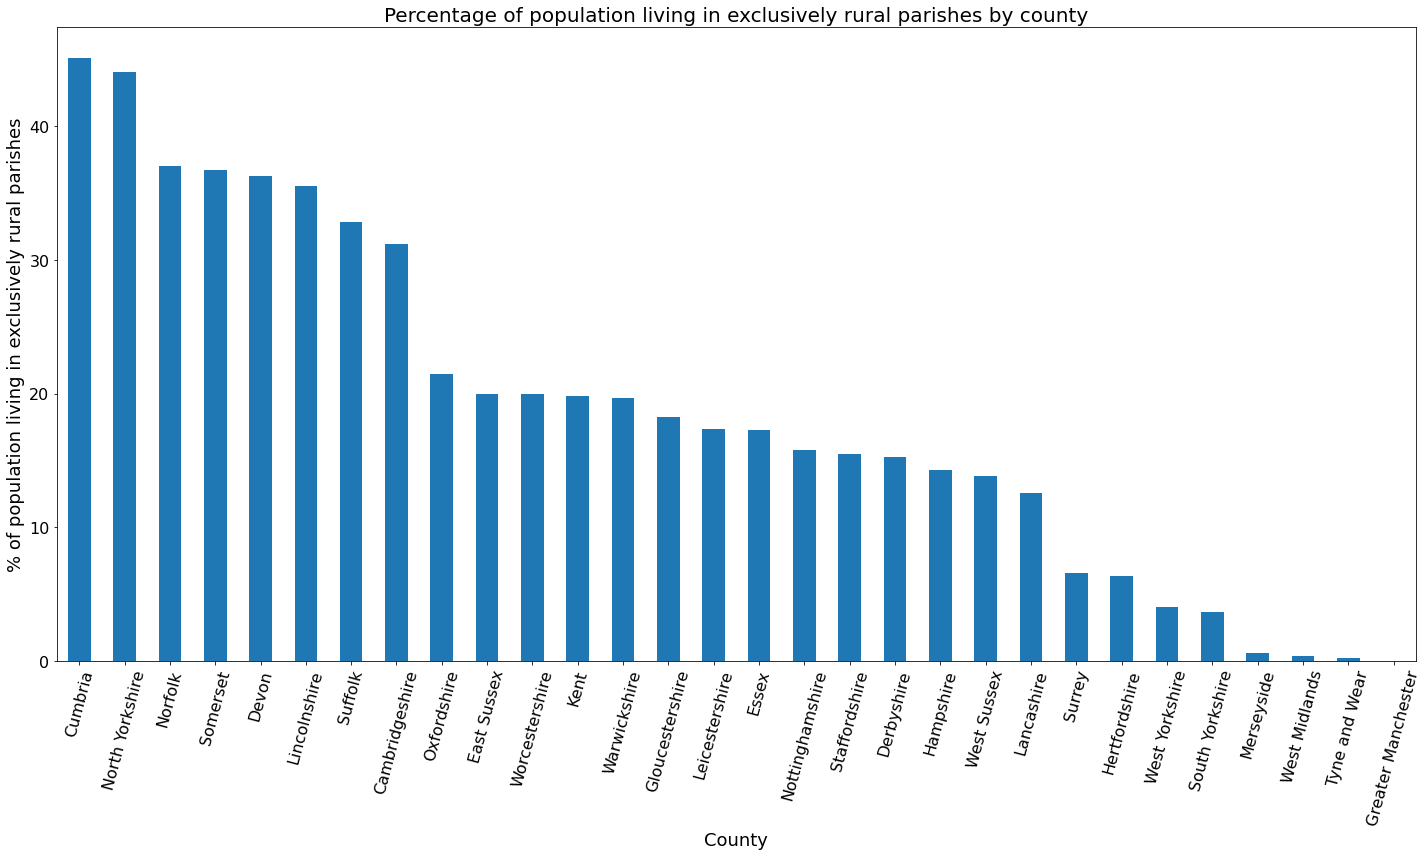

In [527]:
fig, ax = plt.subplots(figsize=(20,12))
loss_df.sort_values(by='pct_population', ascending=False).pct_population.plot(kind='bar', ax=ax)
plt.xlabel('County', fontsize=18)
plt.ylabel('% of population living in exclusively rural parishes', fontsize=18)
plt.xticks(fontsize=16, rotation=75)
plt.yticks(fontsize=16)
plt.title('Percentage of population living in exclusively rural parishes by county', fontsize=20)
plt.tight_layout()
plt.savefig('pct_exclusive_rural.png')
plt.show()

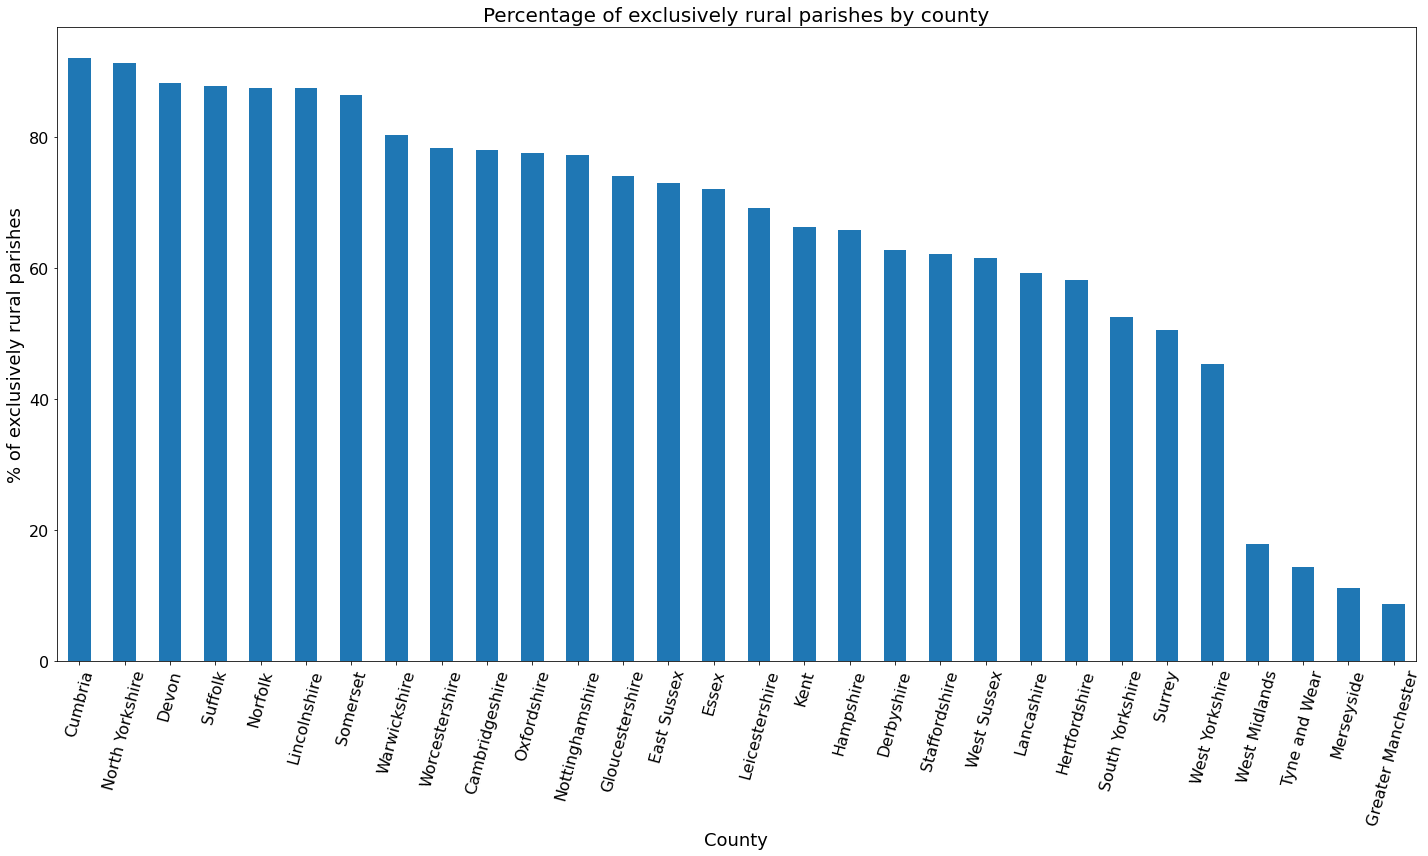

In [528]:
fig, ax = plt.subplots(figsize=(20,12))
loss_df.sort_values(by='pct_parishes', ascending=False).pct_parishes.plot(kind='bar', ax=ax)
plt.xlabel('County', fontsize=18)
plt.ylabel('% of exclusively rural parishes', fontsize=18)
plt.xticks(fontsize=16, rotation=75)
plt.yticks(fontsize=16)
plt.title('Percentage of exclusively rural parishes by county', fontsize=20)
plt.tight_layout()
plt.savefig('pct_exclusive_rural_parishes.png')
plt.show()

In [1]:
loss_df.head()

NameError: name 'loss_df' is not defined